# Lead Scoring Case Study

# Problem Statement

X Education, an online course provider for professionals, faces a low lead conversion rate of around **30%**. While the company generates numerous leads daily through website visits, marketing campaigns, and referrals, only a small fraction convert into paying customers. The lead conversion process involves several stages, from acquiring leads to nurturing them through education and communication before conversion. However, the current approach results in inefficiencies, as the sales team invests significant time and effort in contacting all leads, regardless of their potential to convert. To address this issue, X Education aims to identify "Hot Leads"—the most promising prospects likely to convert. By focusing on these high-potential leads, the sales team can optimize its efforts, enhance customer engagement, and ultimately improve the overall lead conversion rate. This targeted strategy will help the company drive growth while making the sales process more effective and efficient.
The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around **80%**.

 

# Dataset
The dataset provided contains around 9,000 leads and various features like **Lead Source**, **Total Time Spent on Website**, **Total Visits**, and **Last Activity**, among others. The target variable, **Converted**, indicates whether a lead converted (1) or not (0). The goal is to use these features to predict lead conversion and identify "Hot Leads."

Key points:
- **Data Dictionary**: Provides detailed information about each column.
- **Categorical Variables**: Include some levels labeled as "Select," which should be treated as null values since they indicate a non-selection, contributing no meaningful information.
- **Data Cleaning**: Address missing values, handle irrelevant levels (e.g., "Select"), and preprocess categorical variables.
- **Feature Importance**: Identify which attributes significantly influence lead conversion.
- **Outcome**: Build a model to classify leads and improve the focus of the sales team.

This analysis will help prioritize high-potential leads, improving efficiency and conversion rates.

# Goals of the Case Study
There are quite a few goals for this case study:

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## **Exploring the Lead Scoring Dataset**

In [6]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
lead = pd.read_csv(r"Leads.csv")

In [8]:
#Viewing the first few rows of the dataset
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [9]:
#Providing an overview of the DataFrame columns
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
#Viewing the shape of the dataset
lead.shape

(9240, 37)

In [11]:
#Retrieving details about the DataFrame columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### **Insights**
The dataset consists of 9240 rows and 37 columns. Among these, the 'Converted' column will be used as the target variable for prediction.

In [13]:
#Examining unique columns
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## **Data Preprocessing**

In [15]:
print("Columns that have value 'Select':")
for cols in lead.columns:
    if (lead[f'{cols}'] == 'Select').sum()>0:
        print(f'\t{cols}:{(lead[f'{cols}'] == 'Select').sum()}')

Columns that have value 'Select':
	Specialization:1942
	How did you hear about X Education:5043
	Lead Profile:4146
	City:2249


In [16]:
# Replacing 'Select' with NaN Since it means no option is selected
lead = lead.replace('Select', np.nan)

In [17]:
for cols in lead.columns:
    if lead[f'{cols}'].nunique()<2:
        print(f'{cols}:{lead[f'{cols}'].unique()}')

Magazine:['No']
Receive More Updates About Our Courses:['No']
Update me on Supply Chain Content:['No']
Get updates on DM Content:['No']
I agree to pay the amount through cheque:['No']


In [18]:
# Dropping uni-valued columns
lead1= lead.drop(['Get updates on DM Content','Receive More Updates About Our Courses','Update me on Supply Chain Content','Magazine','I agree to pay the amount through cheque'],axis=1)

In [19]:
# Removing Id values since they are unique for everyone
lead1 = lead1.drop(['Prospect ID', 'Lead Number'], axis=1)
print(lead1.shape)

(9240, 30)


In [20]:
for cols in lead1.columns:
        print(cols,':', round(lead1[f'{cols}'].isnull().sum()/lead1[f'{cols}'].shape[0]*100,2),'%')

Lead Origin : 0.0 %
Lead Source : 0.39 %
Do Not Email : 0.0 %
Do Not Call : 0.0 %
Converted : 0.0 %
TotalVisits : 1.48 %
Total Time Spent on Website : 0.0 %
Page Views Per Visit : 1.48 %
Last Activity : 1.11 %
Country : 26.63 %
Specialization : 36.58 %
How did you hear about X Education : 78.46 %
What is your current occupation : 29.11 %
What matters most to you in choosing a course : 29.32 %
Search : 0.0 %
Newspaper Article : 0.0 %
X Education Forums : 0.0 %
Newspaper : 0.0 %
Digital Advertisement : 0.0 %
Through Recommendations : 0.0 %
Tags : 36.29 %
Lead Quality : 51.59 %
Lead Profile : 74.19 %
City : 39.71 %
Asymmetrique Activity Index : 45.65 %
Asymmetrique Profile Index : 45.65 %
Asymmetrique Activity Score : 45.65 %
Asymmetrique Profile Score : 45.65 %
A free copy of Mastering The Interview : 0.0 %
Last Notable Activity : 0.0 %


In [21]:
lead1.isnull().sum(axis=1)/lead1.shape[0]

0       0.000541
1       0.000541
2       0.000108
3       0.000108
4       0.000216
          ...   
9235    0.000108
9236    0.000108
9237    0.000108
9238    0.000541
9239    0.000108
Length: 9240, dtype: float64

In [22]:
(lead1.isnull().sum(axis=1)/lead1.shape[0]).sum()

5.889502164502165

#### ***Columns with more than 40% missing values should be removed.***
#### ***The maximum threshold typically ranges between 40% and 50%, depending on the specific sector and the quality of the data collected.***

In [24]:
lead2 = lead1.drop(['Lead Profile','Tags','Lead Quality','Asymmetrique Profile Index', 'Asymmetrique Activity Index', 
                    'Asymmetrique Activity Score', 'Asymmetrique Profile Score','How did you hear about X Education', 'City'], axis=1)
lead2.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... What is your current occupation  \
0  Page Visited on Website     NaN  ...                      Unemployed   
1             Email Opened   India  ...                      Unemployed   
2             Email Opened   India  ...                         Student   
3              Unreachable   India  ...                      Unemployed   
4        Converted to Lead   India  ...                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 21 columns]

In [25]:
#checking the null values again
round(100 * (lead2.isnull().sum() / len(lead2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### ***We can fill the missing values (NA) with 'Not given'. If it comes while building algorithm and if it affects model then we will drop it.***

In [27]:
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna('Not Given')
lead2['Country'] = lead2['Country'].fillna('Not Given')
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna('Not Given')
lead2['Specialization'] = lead2['Specialization'].fillna('Not Given')
lead2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [28]:
#checking the null values again
round(100 * (lead2.isnull().sum() / len(lead2.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [29]:
# Checking the percent of loss if the null values are removed
percent_loss = round(100 * (sum(lead2.isnull().sum(axis=1) > 1) / lead2.shape[0]), 2)

# Removing rows with more than 1 null value
lead3 = lead2[lead2.isnull().sum(axis=1) < 1]

# Checking the number of rows left in percent compared to the original dataset
percent_left = round(100 * (lead3.shape[0]) / (lead.shape[0]), 2)

percent_loss, percent_left

(1.48, 98.2)

In [30]:
#checking the null values again
round(100 * (lead3.isnull().sum() / len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

#### **Replacing the Country values as India,Not Given,Other Country as there are several countries present it will be difficult to analyse so we will bucket them into the above mentioned segments.**


In [32]:
lead3["Country"].value_counts()

Country
India                   6491
Not Given               2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [33]:
def slots(x):
    '''A function to categorize/bucket the values of Countries'''
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Given":
        category = "Not Given"
    else:
        category = "Other Country" 
    return category

lead3['Country'] = lead3.apply(lambda x: slots(x['Country']), axis=1)
lead3['Country'].value_counts()


Country
India            6491
Not Given        2296
Other Country     287
Name: count, dtype: int64

In [34]:
# To Understand all the categorical values in lead3
for column in lead3:
    if lead3[column].dtype == 'object':  # Ensure we only work with categorical columns (strings or objects)
        print(lead3[column].astype('category').value_counts())
        print('----------------------------------------------------------------------------------------')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
---------

## **Exploratory Data Analysis and Visualization**

Here, we will perform the following tasks:

Check for Logit Relationships:
In logistic regression, the outcome variable is binary (0 or 1), and we need to ensure that there is an appropriate relationship between the predictors and the log-odds of the outcome. It's essential to assess whether the predictors influence the log-odds of the outcome variable in a way that logistic regression can model effectively. If necessary, we can explore transformations or other methods to make the relationship between the predictors and outcome suitable for modeling.

Examine Multicollinearity:
Multicollinearity can still pose a problem in logistic regression. If predictor variables are highly correlated, it can cause unstable estimates of the coefficients and make the model less reliable. To detect multicollinearity, we can use tools like the Variance Inflation Factor (VIF) or examine correlation matrices. If predictors exhibit high multicollinearity, we may need to remove or combine them to improve model stability.

Identify Strong Associations with the Outcome:
It's important to identify which predictors have the most significant impact on the binary outcome in logistic regression. We can do this by analyzing the relationships between each predictor and the outcome. For continuous predictors, we can use correlation coefficients, while for categorical predictors, we might use chi-square tests. Additionally, odds ratios can be calculated to quantify the effect of each predictor on the likelihood of the outcome.

Feature Selection:
Feature selection helps enhance the performance of a logistic regression model by reducing overfitting and focusing on the most meaningful predictors. We can apply techniques like forward selection, backward elimination, or L1 regularization (Lasso) to select the most important features. Statistical significance, determined by p-values in the logistic regression model, will also guide us in retaining the predictors that are most relevant to the outcome.

Data Transformation (if needed):
Logistic regression assumes that the relationship between predictors and the log-odds of the outcome is appropriate. If predictors exhibit non-linear relationships with the outcome, we may need to apply transformations such as logarithmic, square root, or polynomial transformations. Additionally, if the predictors are on different scales, we might apply standardization or normalization to ensure the model works efficiently and the coefficients are interpretable.

### **Analysing Numerical Features**

In [38]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

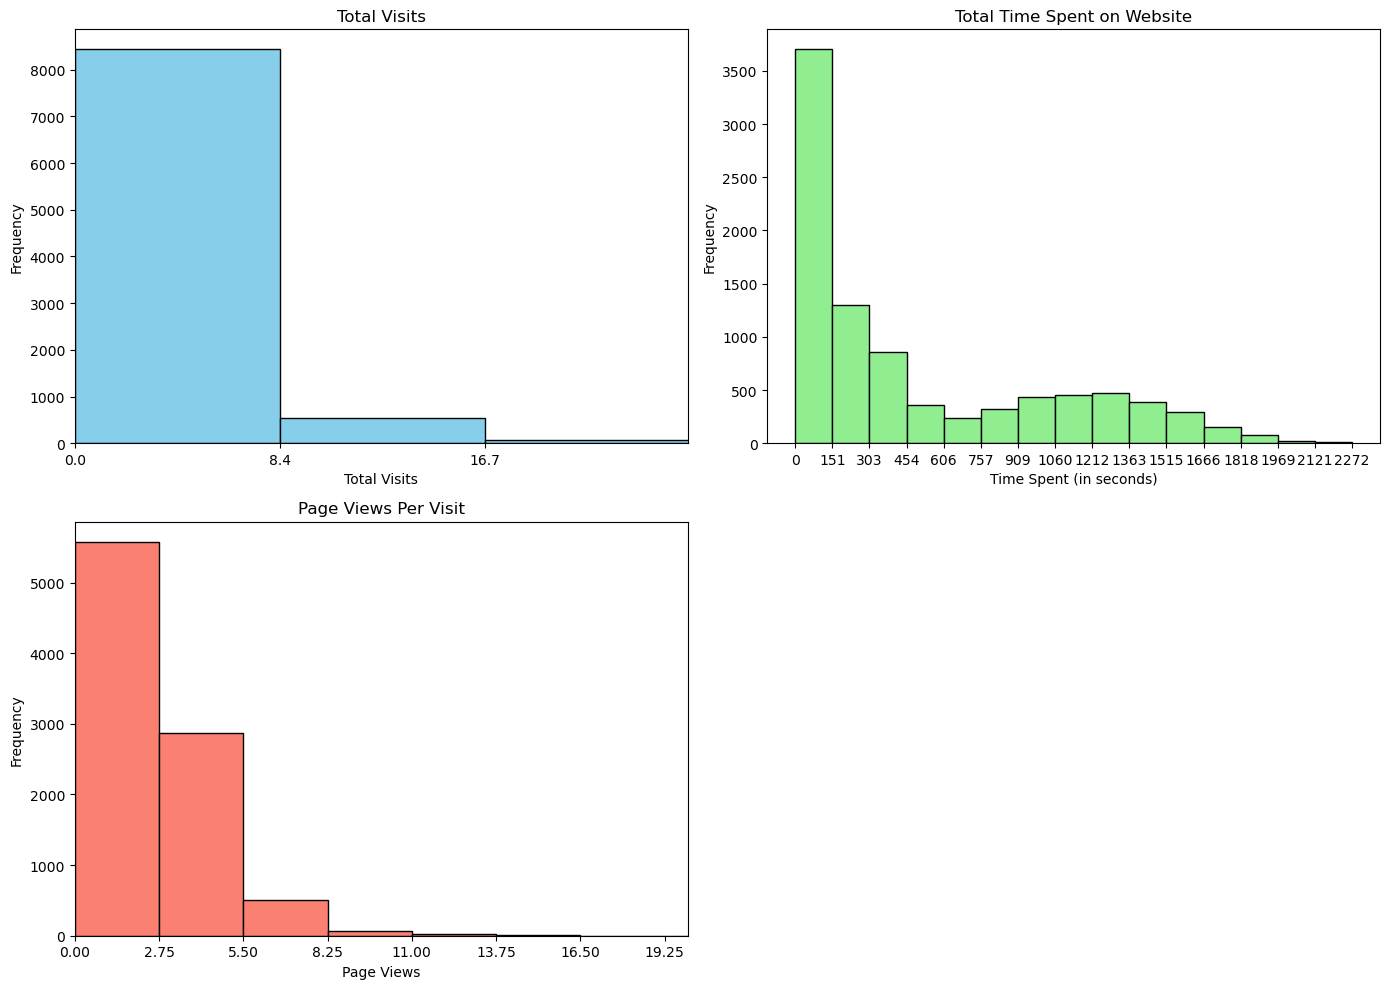

In [39]:
plt.figure(figsize=(14, 10))

# Subplot for 'Total Visits'
plt.subplot(221)
n,bins,_ =plt.hist(lead3['TotalVisits'], bins=30, color='skyblue', edgecolor='black')
plt.title('Total Visits')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.xlim(0, 25)

# Subplot for 'Total Time Spent on Website'
plt.subplot(222)
n,bins,_ =plt.hist(lead3['Total Time Spent on Website'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Total Time Spent on Website')
plt.xlabel('Time Spent (in seconds)')
plt.xticks(bins)
plt.ylabel('Frequency')

# Subplot for 'Page Views Per Visit'
plt.subplot(223)
n,bins,_ =plt.hist(lead3['Page Views Per Visit'], bins=20, color='salmon', edgecolor='black')
plt.title('Page Views Per Visit')
plt.xlabel('Page Views')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.xlim(0, 20)

# Display the plots
plt.tight_layout()
plt.show()


In [40]:
# Function to find the correlation between two numeric columns
def add_corr_coefficient(x, y, **kwargs): 
    r = x.corr(y, 'pearson') 
    ax = plt.gca() 
    ax.annotate(f'ρ = {r:.2f}', xy=(.5, .9), xycoords=ax.transAxes, ha='center', va='center', fontsize=12)

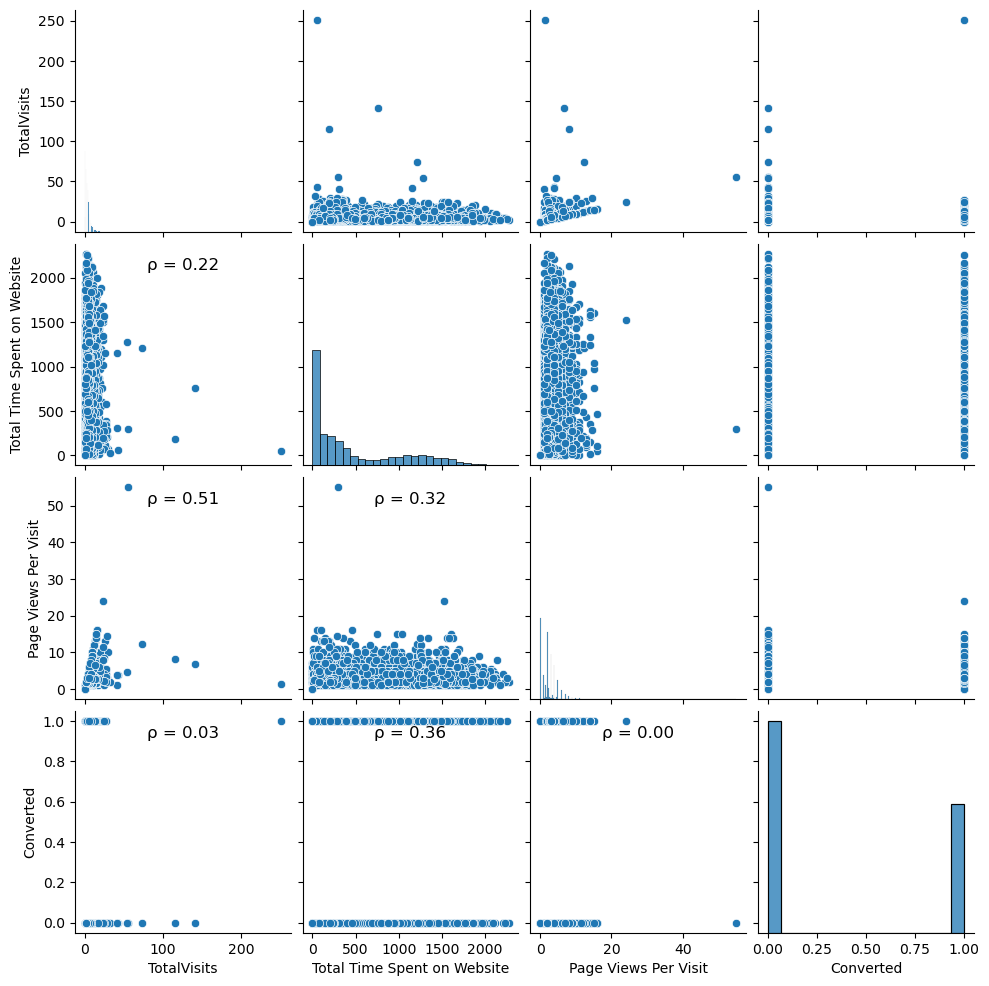

In [41]:
# Plotting the pairplots with the correlation function
pairplot = sns.pairplot(lead3[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']])
pairplot.map_lower(add_corr_coefficient)
plt.show()

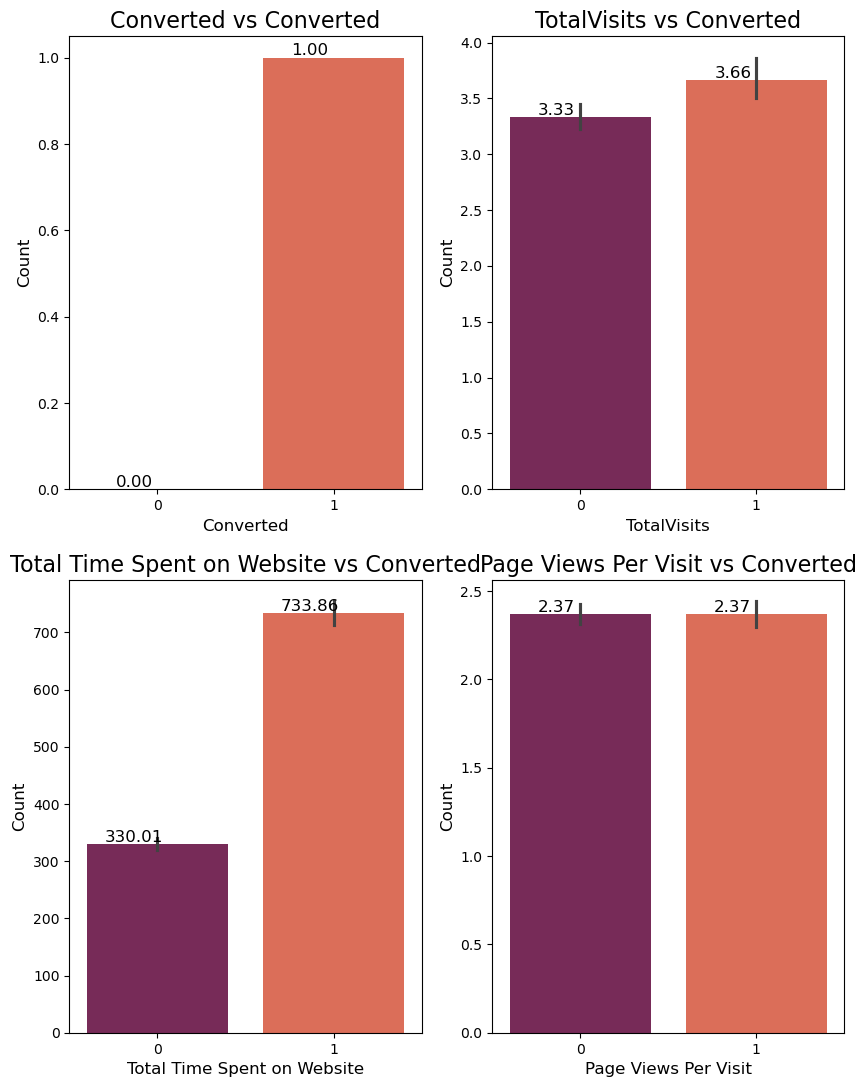

In [42]:
# Plotting the graphs of numeric columns vs Converted Column
plt.figure(figsize=(10, 20))

numerical_columns = lead3.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 2 + 1, 2, i)
    
    bar_plt = sns.barplot(data=lead3,y=f'{column}',x='Converted',palette='rocket')
    for p in bar_plt.patches: 
        bar_plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 3, 
                                                  p.get_height()), ha='center', va='center', 
                            fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') 
    
    plt.title(f'{column} vs Converted', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12) 

### **Analysing Categorical Variables**

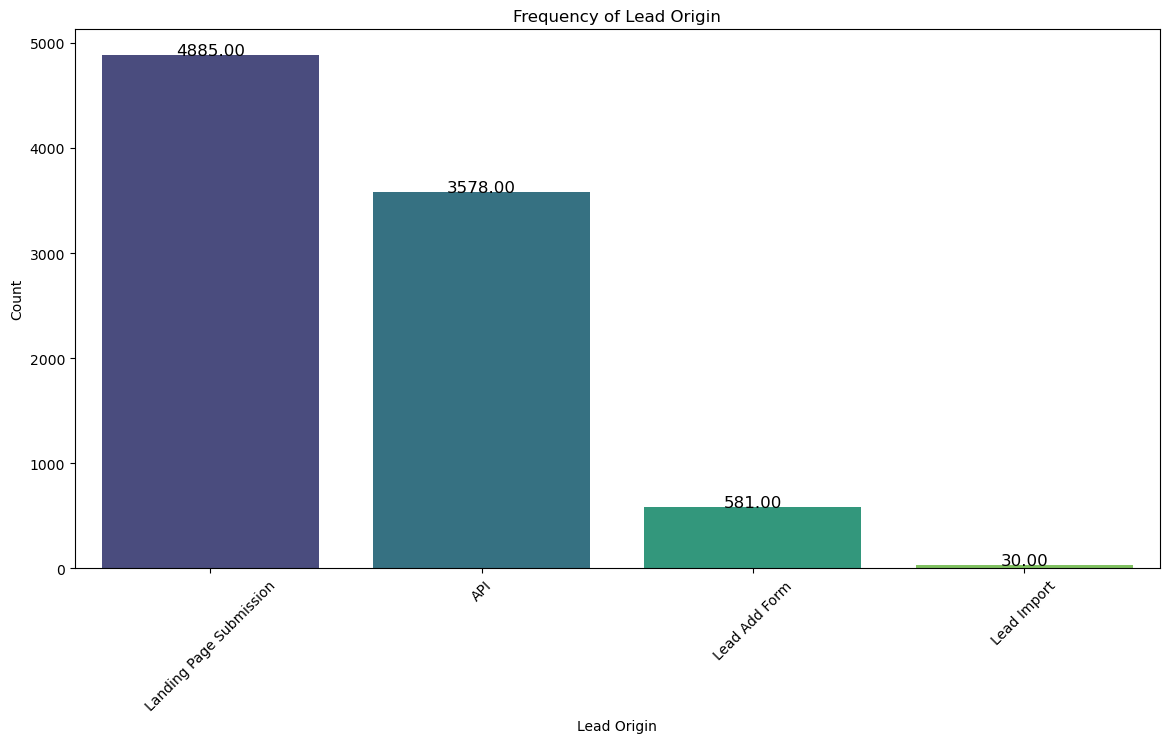

In [44]:
plt.figure(figsize=(14, 7))
sns.barplot(
    x=lead3['Lead Origin'].value_counts().index,
    y=lead3['Lead Origin'].value_counts().values,
    palette="viridis"
)
converted_counts = lead3['Lead Origin'].value_counts()
for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12)

plt.title('Frequency of Lead Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


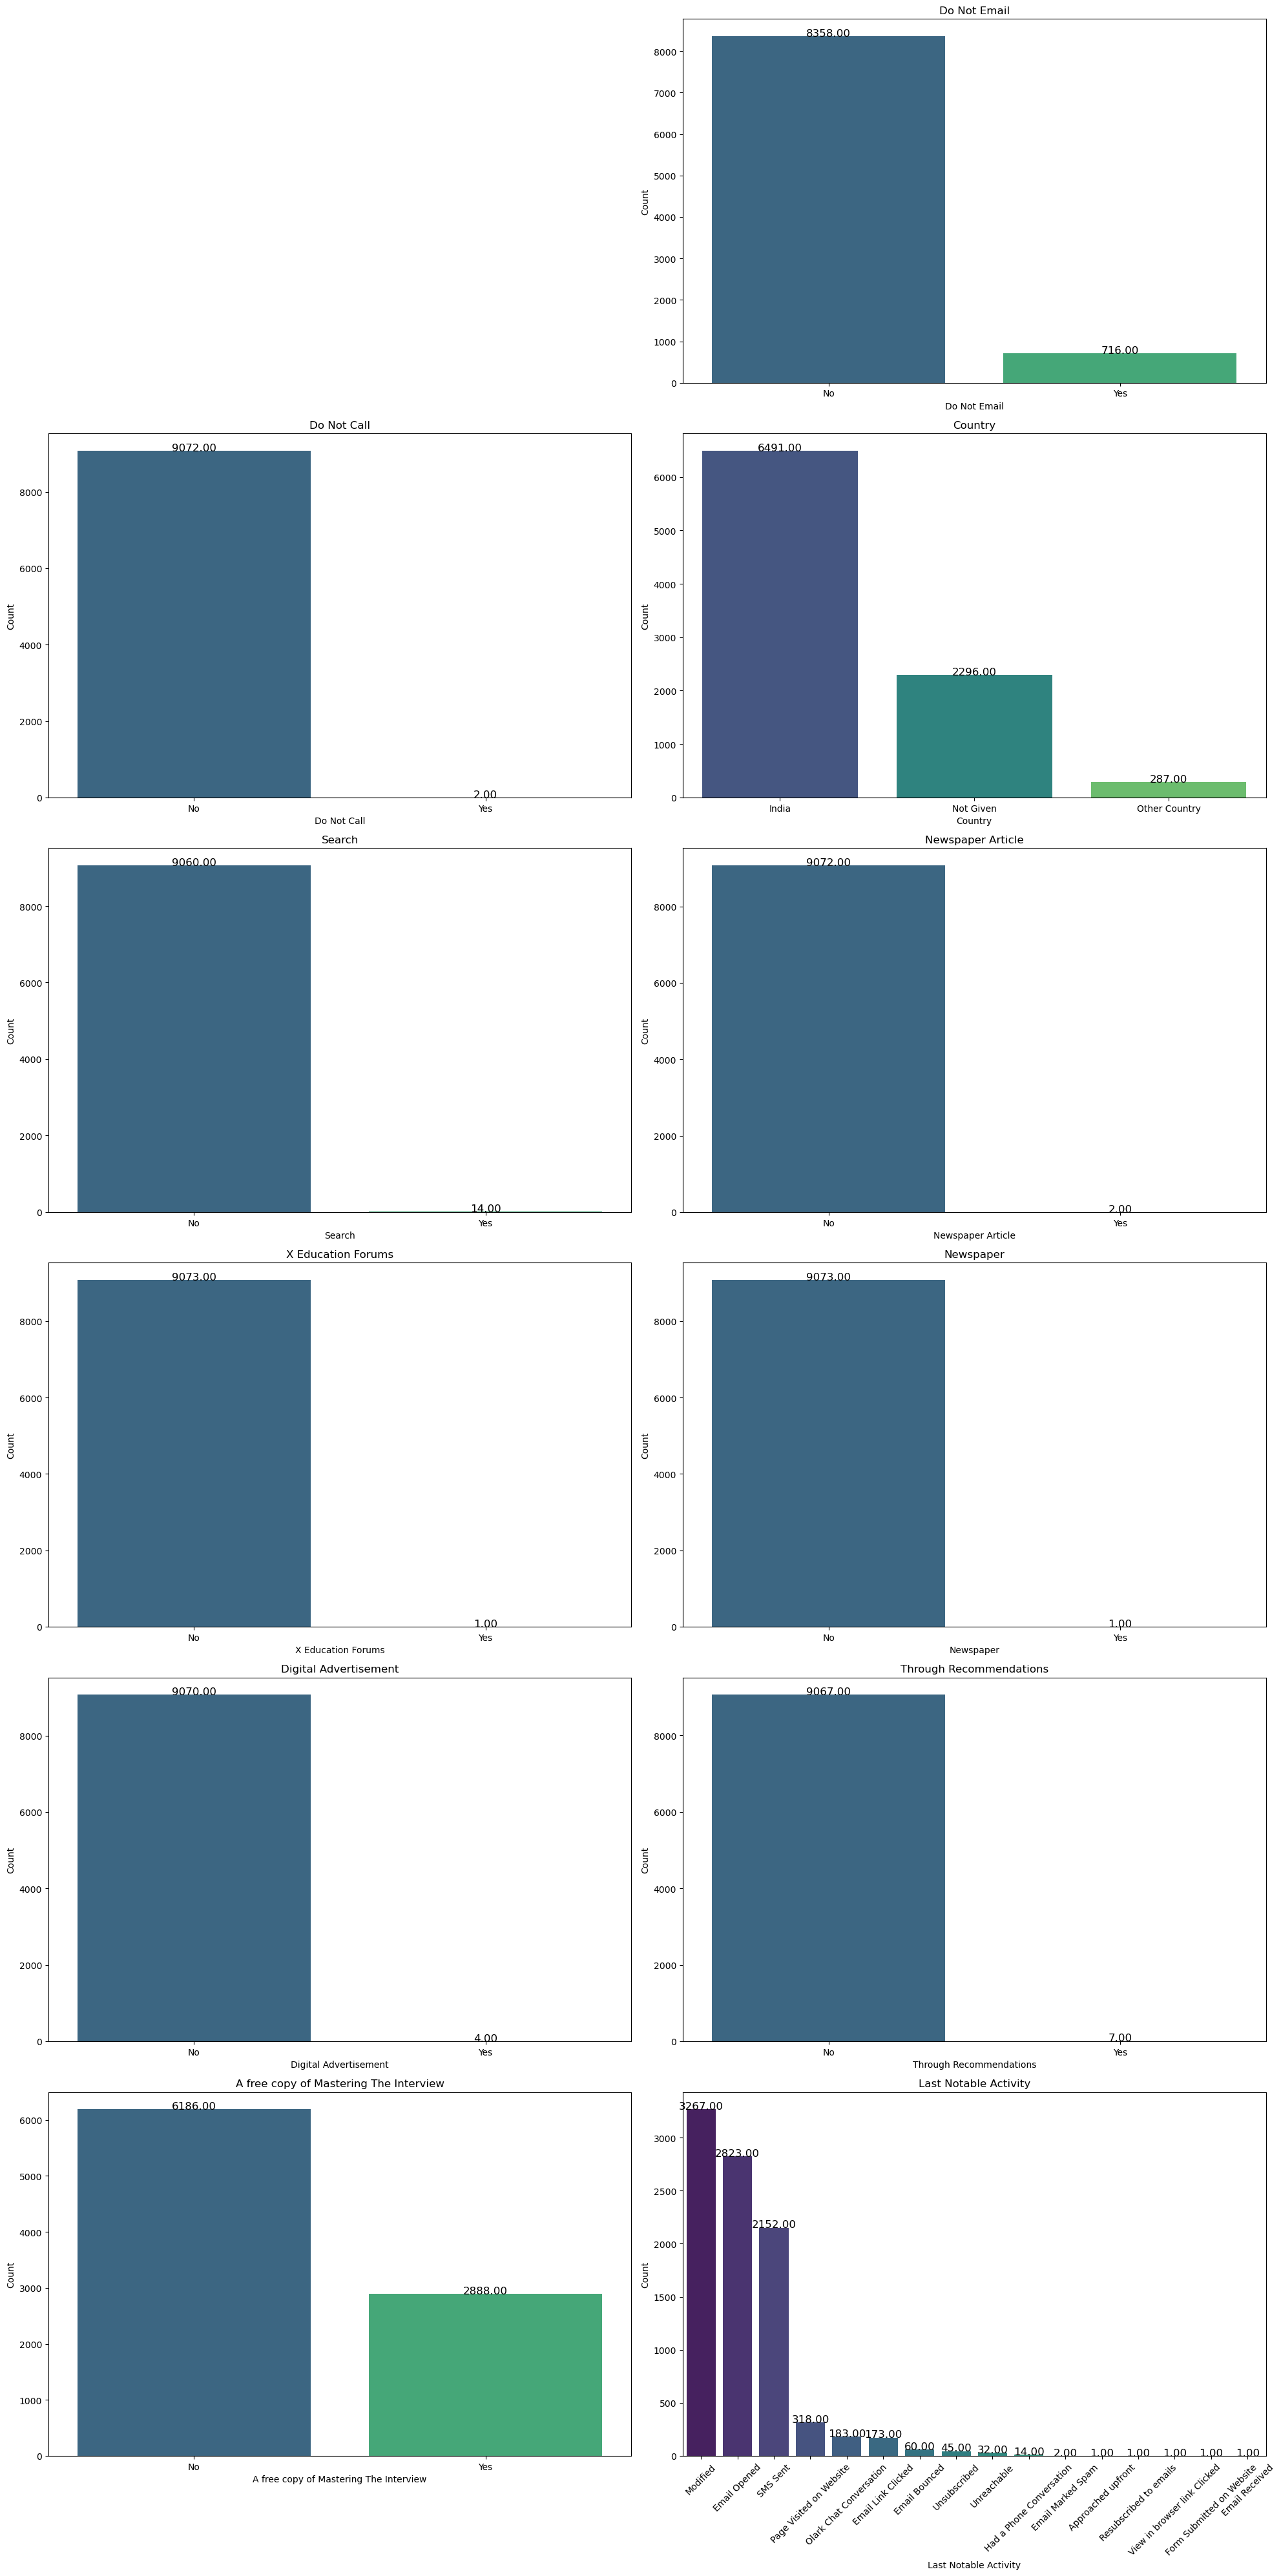

In [45]:
# Define the columns to plot

columns_to_plot = ['Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'A free copy of Mastering The Interview',
    'Last Notable Activity'
]

plt.figure(figsize=(20, 40))

for i, column in enumerate(columns_to_plot, 2):  # Start from subplot index 2
    plt.subplot(6, 2, i)
    
    sns.barplot(
        x=lead3[column].value_counts().index,
        y=lead3[column].value_counts().values,
        palette="viridis"
    )
    converted_counts = lead3[f'{column}'].value_counts()
    for i, value in enumerate(converted_counts.values):
        plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=12)
    
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45 if column == 'Last Notable Activity' else 0)

plt.tight_layout()
plt.show()


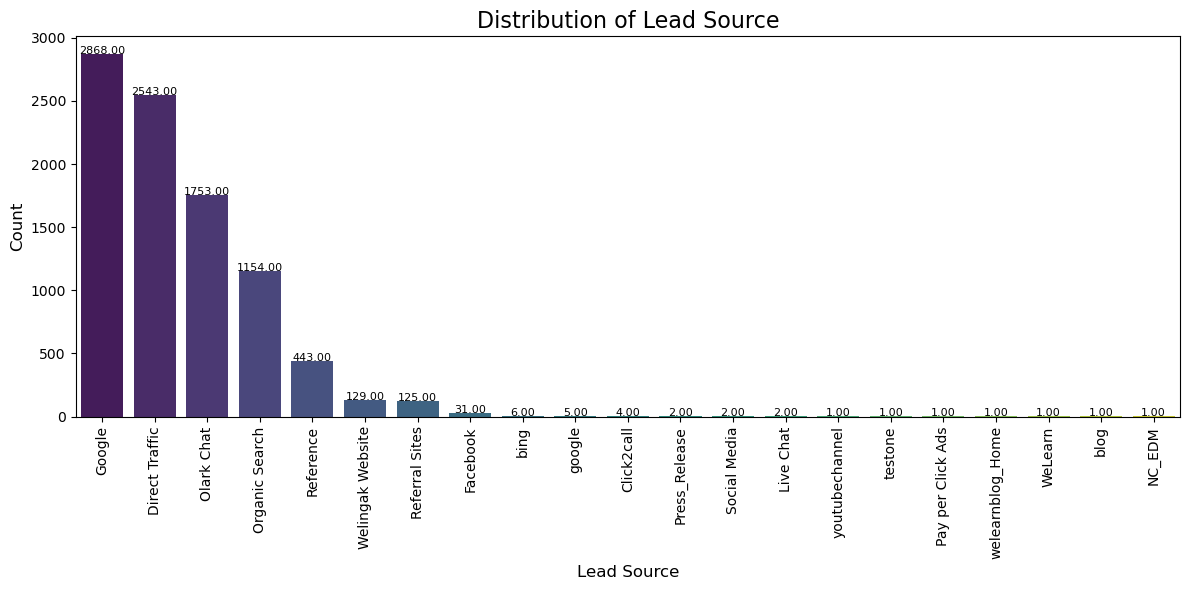

In [46]:
plt.figure(figsize=(12, 6))
converted_counts = lead3['Lead Source'].value_counts()
for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=8)
sns.countplot(
    data=lead3,
    x='Lead Source',
    order=lead3['Lead Source'].value_counts().index,
    palette='viridis'
)
plt.tick_params(axis='x', rotation=90) 
plt.title('Distribution of Lead Source', fontsize=16)
plt.xlabel('Lead Source', fontsize=12) 
plt.ylabel('Count', fontsize=12)  
plt.tight_layout()
plt.show()

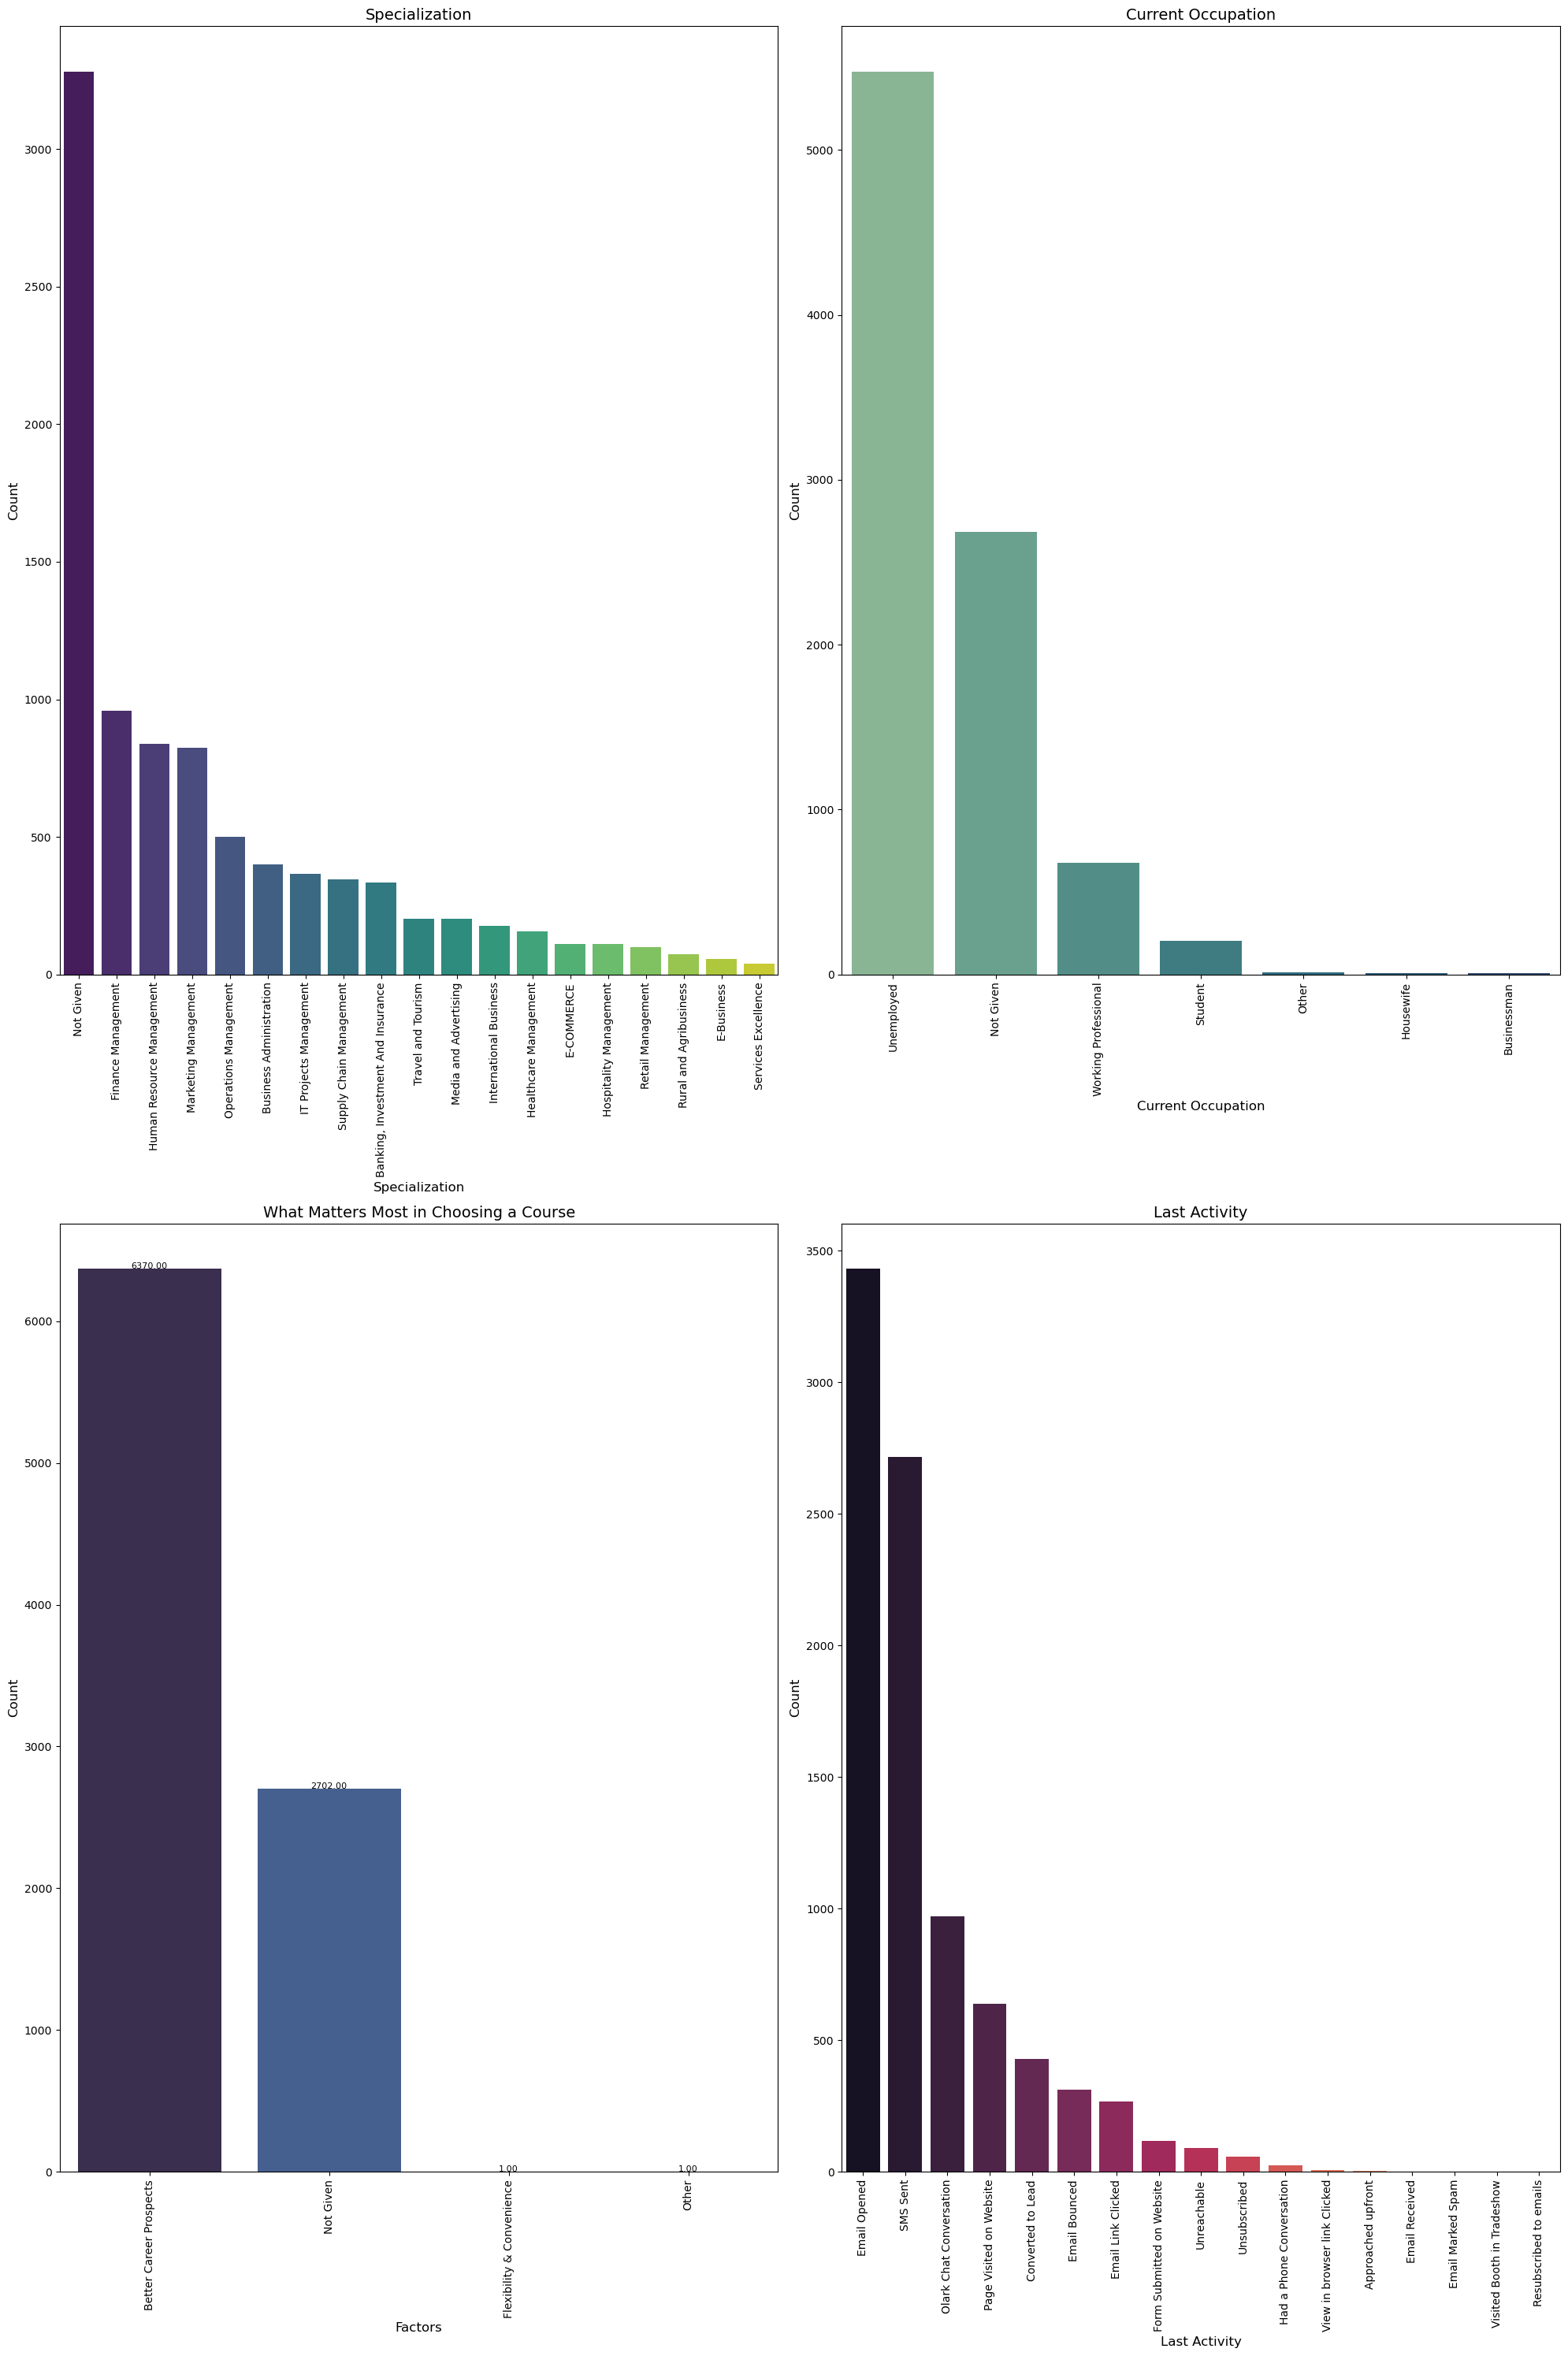

In [47]:
plt.figure(figsize=(20, 30))

# Plot 1: Specialization
plt.subplot(2, 2, 1)
sns.countplot(
    x='Specialization', 
    data=lead3, 
    order=lead3['Specialization'].value_counts().index, 
    palette='viridis',
).tick_params(axis='x', rotation=90)
# converted_counts = lead3['Specialization'].value_counts()
# for i, value in enumerate(converted_counts.values):
#     plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=8)
plt.title('Specialization', fontsize=14)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot 2: Current Occupation
plt.subplot(2, 2, 2)
sns.countplot(
    x='What is your current occupation', 
    data=lead3, 
    order=lead3['What is your current occupation'].value_counts().index, 
    palette='crest'
).tick_params(axis='x', rotation=90)
# converted_counts = lead3['What is your current occupation'].value_counts()
# for i, value in enumerate(converted_counts.values):
#     plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=8)
plt.title('Current Occupation', fontsize=14)
plt.xlabel('Current Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot 3: What Matters Most
plt.subplot(2, 2, 3)
sns.countplot(
    x='What matters most to you in choosing a course', 
    data=lead3, 
    order=lead3['What matters most to you in choosing a course'].value_counts().index, 
    palette='mako'
).tick_params(axis='x', rotation=90)
converted_counts = lead3['What matters most to you in choosing a course'].value_counts()
for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=8)
plt.title('What Matters Most in Choosing a Course', fontsize=14)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot 4: Last Activity
plt.subplot(2, 2, 4)
sns.countplot(
    x='Last Activity', 
    data=lead3, 
    order=lead3['Last Activity'].value_counts().index, 
    palette='rocket'
).tick_params(axis='x', rotation=90)
# converted_counts = lead3['Last Activity'].value_counts()
# for i, value in enumerate(converted_counts.values):
#     plt.text(i, value + 1, f'{value:.2f}', ha='center', fontsize=8)
plt.title('Last Activity', fontsize=14)
plt.xlabel('Last Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


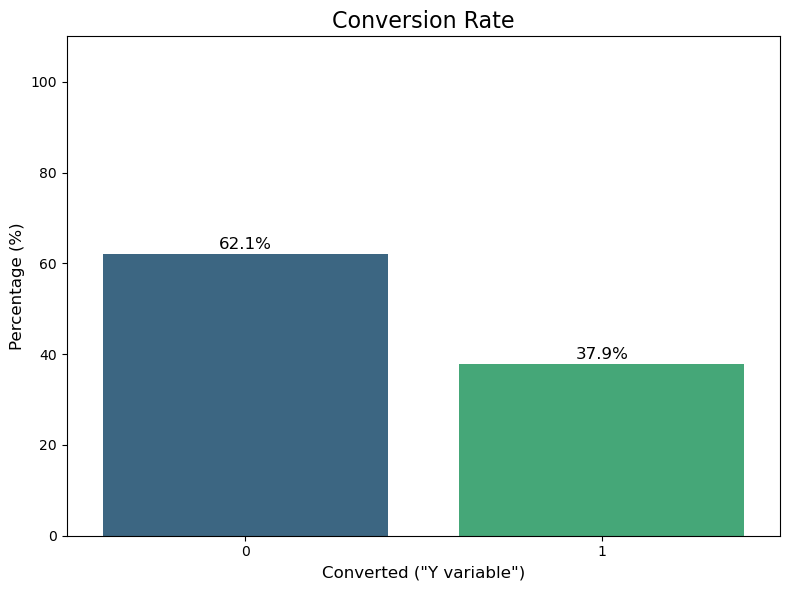

In [48]:
# Calculate the lead conversion percentage for the given dataset
converted_counts = lead3['Converted'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_counts.index, 
    y=converted_counts.values, 
    palette='viridis'
)
plt.title('Conversion Rate', fontsize=16)
plt.xlabel('Converted ("Y variable")', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

In [49]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

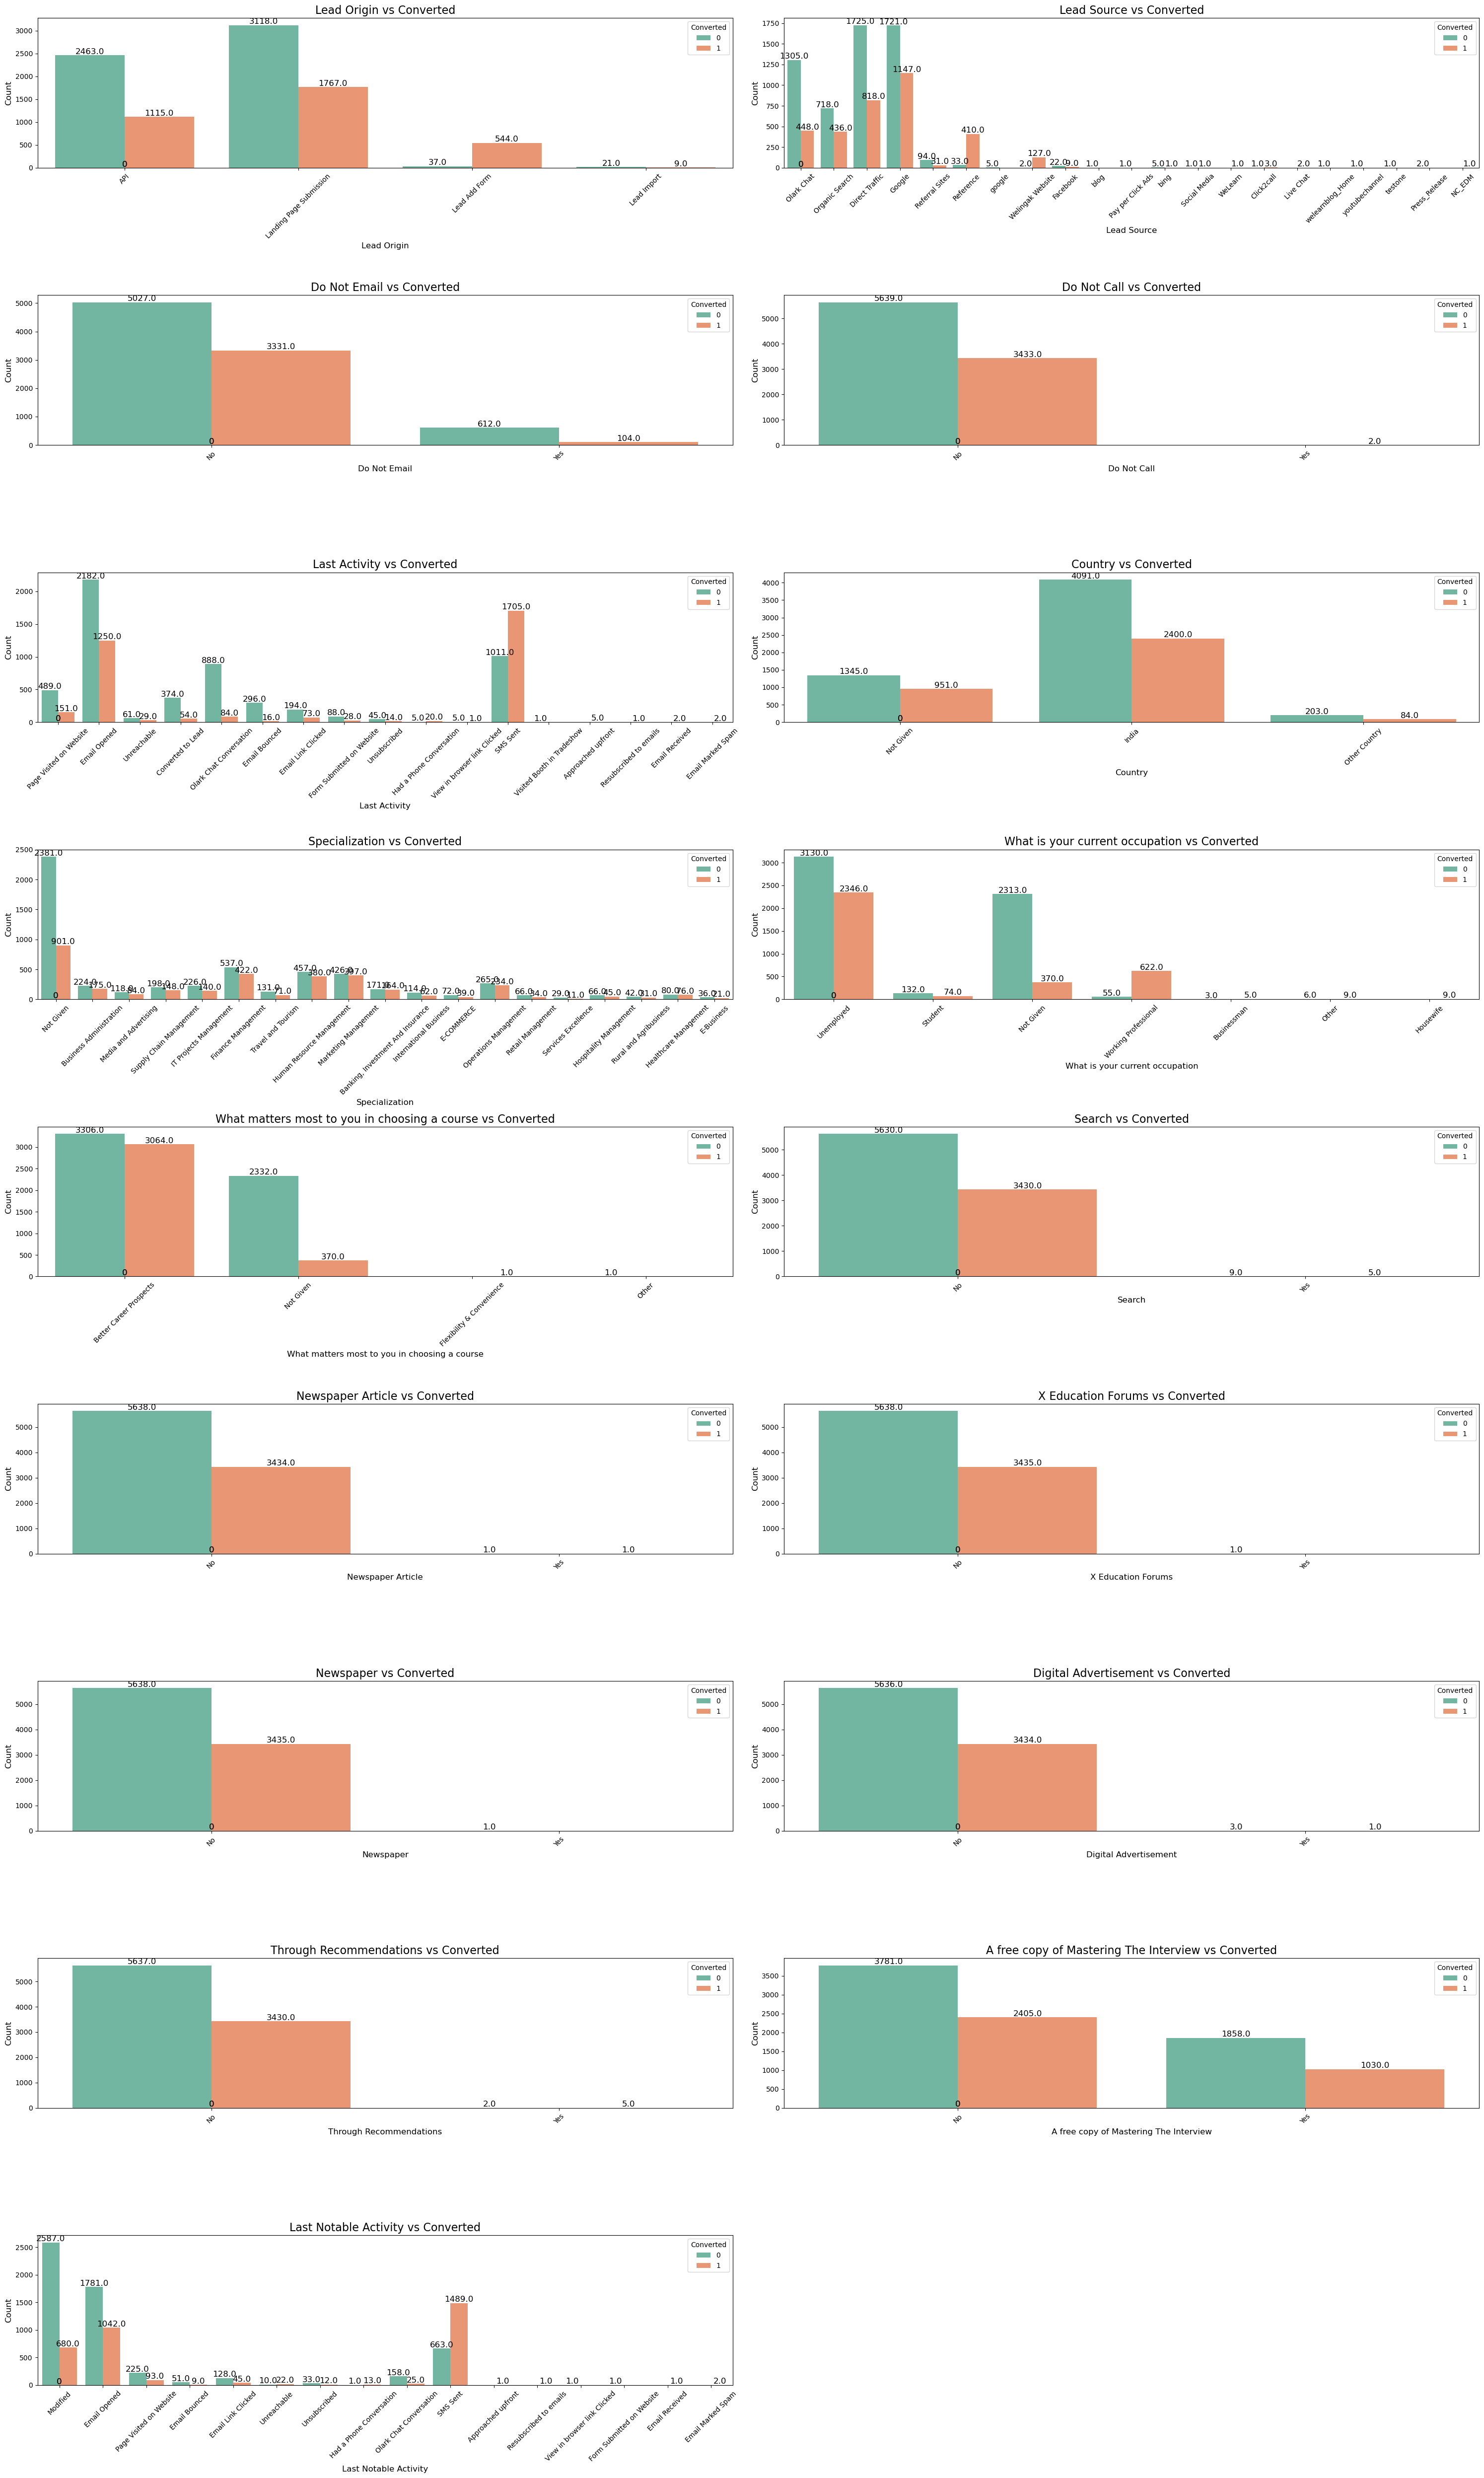

In [50]:
# List of categorical columns in the dataset (excluding 'Lead Number' and 'Converted')
categorical_columns = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 
    'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
    'What matters most to you in choosing a course', 'Search', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

plt.figure(figsize=(30, 50))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    
    count_plot = sns.countplot(data=lead3, x=column, hue='Converted', palette='Set2',)
    for p in count_plot.patches: 
        count_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                                                  p.get_height()), ha='center', va='center', 
                            fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') 
    
    plt.title(f'{column} vs Converted', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45) 

plt.tight_layout() 
plt.show()


#### **Overall Insights:**
- **Engagement Variation**: There is considerable variation in user engagement (Total Visits, Time on Site, and Page Views per Visit). While some users interact minimally, a significant subset is highly engaged.
- **Personalization Opportunity**: The varying behaviors (e.g., short visits vs. long visits, few pages vs. many pages) suggest opportunities for personalizing content or improving the user experience, especially for users who spend little time on the site or view only a few pages.
- **Potential for Improvement**: There may be an opportunity to improve user retention for those who spend little time or view only one page by optimizing landing pages or offering engaging content to encourage deeper exploration of the site.
- There are no outliers present

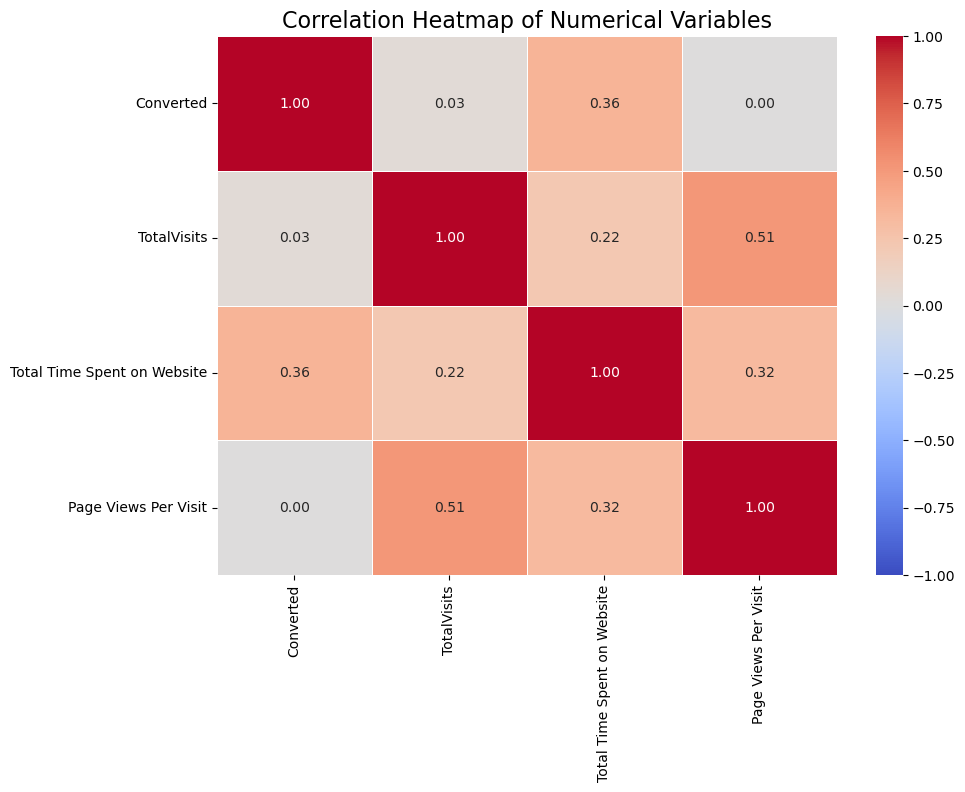

In [52]:
plt.figure(figsize=(10, 7))

numerical_columns = lead3.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = lead3[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

## **Model Building**

### **Feature Transformation: Converting categorical variables to dummy variables**
- Creating dummy variables (also known as one-hot encoding) is a crucial step in machine learning algorithms, particularly for algorithms that require numerical inputs, like linear regression, logistic regression, and most tree-based models.

In [55]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [56]:
categorical_columns = lead3.loc[:, lead3.dtypes == 'object'].columns

print(categorical_columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [57]:
# Create dummy variables using 'get_dummies' for categorical columns in lead3
dummy = pd.get_dummies(lead3[['Lead Origin', 'Specialization', 'Lead Source', 'Do Not Email', 
                              'Last Activity', 'What is your current occupation', 
                              'A free copy of Mastering The Interview', 'Last Notable Activity']], 
                       drop_first=True,dtype=int,)

lead3_dum = pd.concat([lead3, dummy], axis=1)

# Display the dataframe with dummy variables added
lead3_dum.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity    Country  ...  \
0  Page Visited on Website  Not Given  ...   
1             Email Opened      India  ...   
2             Email Opened      India  ...   
3              Unreachable      India  ...   
4        Converted to Lead      India  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Resubscribed to emails Last Notable Activity_SMS Sent  \
0                                            0                              0   
1                                            0                              0   
2                                            0                              0   
3                                            0                              0   
4                                            0                              0   

  Last Notable Activity_Unreachable Last Notable Activity_Unsubscribed  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 101 columns]

In [58]:
lead3_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Columns: 101 entries, Lead Origin to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int32(80), int64(2), object(17)
memory usage: 4.3+ MB


In [59]:
# Dropping specific columns from lead3_dum
lead3_dum = lead3_dum.drop(
    ['What is your current occupation_Not Given', 'Lead Origin', 'Lead Source', 'Do Not Email', 
     'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
     'What is your current occupation', 'What matters most to you in choosing a course', 
     'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
     'Digital Advertisement', 'Through Recommendations', 
     'A free copy of Mastering The Interview', 'Last Notable Activity','Specialization_Not Given'], 
    axis=1
)

lead3_dum

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_Business Administration  Specialization_E-Business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_E-COMMERCE  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4                             0  ...   
...                         ...  ...   
9235                          0  ...   
9236                          0  ...   
9237                          0  ...   
9238                          0  ...   
9239                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                    

### **Feature Transformation: Rescaling the numerical variables using MinMaxScaler**
- Rescaling the numerical variables helps to bring all the numeric values to one scale

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

lead3_dum[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(
    lead3_dum[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]
)

lead3_dum.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0     0.000000                     0.000000              0.000000   
1          0     0.019920                     0.296655              0.045455   
2          1     0.007968                     0.674296              0.036364   
3          0     0.003984                     0.134243              0.018182   
4          1     0.007968                     0.628521              0.018182   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  ...  \
0                          0                          0  ...   
1                          0                          0  ...   
2                          0                          0  ...   
3                          0                          0  ...   
4                          0                          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                          

### **Splitting the Data into Training and Testing Sets**

In [63]:
# Import the required library
from sklearn.model_selection import train_test_split
# Dropping the 'Converted' column and assign the result to X
X = lead3_dum.iloc[:,1:]
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0     0.000000                     0.000000              0.000000   
1     0.019920                     0.296655              0.045455   
2     0.007968                     0.674296              0.036364   
3     0.003984                     0.134243              0.018182   
4     0.007968                     0.628521              0.018182   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0     

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9074 non-null   float64
 1   Total Time Spent on Website                           9074 non-null   float64
 2   Page Views Per Visit                                  9074 non-null   float64
 3   Lead Origin_Landing Page Submission                   9074 non-null   int32  
 4   Lead Origin_Lead Add Form                             9074 non-null   int32  
 5   Lead Origin_Lead Import                               9074 non-null   int32  
 6   Specialization_Business Administration                9074 non-null   int32  
 7   Specialization_E-Business                             9074 non-null   int32  
 8   Specialization_E-COMMERCE                             9074 non-

In [65]:
# Assign the 'Converted' column to the target variable y
y = lead3_dum.loc[:,'Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

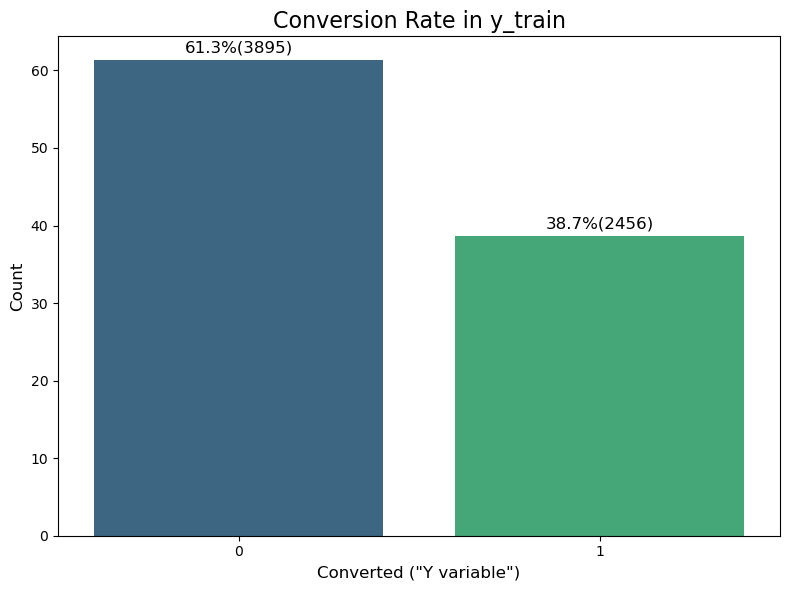

In [67]:
# Calculate percentages
converted_counts = y_train.value_counts()
converted_perc = y_train.value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_perc.index, 
    y=converted_perc.values, 
    palette='viridis'
)
plt.title('Conversion Rate in y_train', fontsize=16)
plt.xlabel('Converted ("Y variable")', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, value in enumerate(converted_perc.values):
    plt.text(i, value + 1, f'{value:.1f}%({converted_counts[i]})', ha='center', fontsize=12)

# plt.ylim(0, 110)
plt.tight_layout()
plt.show()

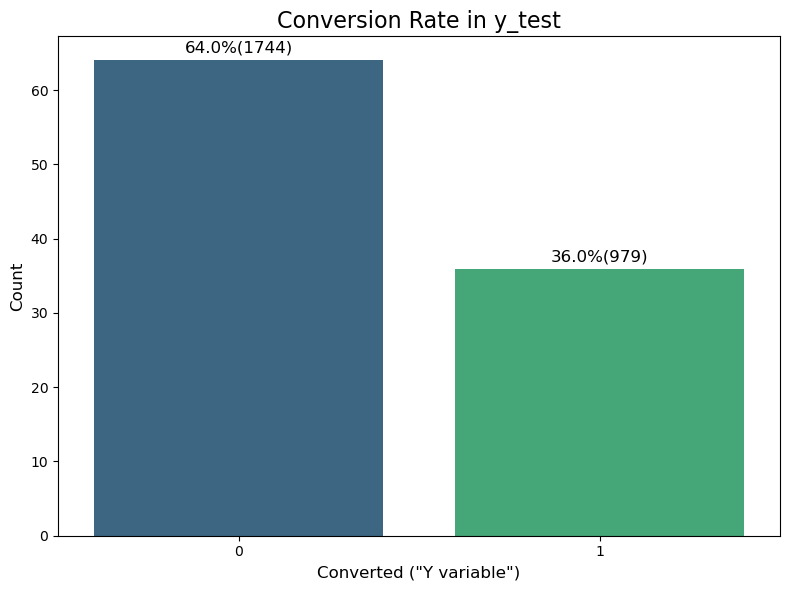

In [68]:
# Calculate percentages
converted_counts = y_test.value_counts()
converted_perc = y_test.value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_perc.index, 
    y=converted_perc.values, 
    palette='viridis'
)
plt.title('Conversion Rate in y_test', fontsize=16)
plt.xlabel('Converted ("Y variable")', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, value in enumerate(converted_perc.values):
    plt.text(i, value + 1, f'{value:.1f}%({converted_counts[i]})', ha='center', fontsize=12)

# plt.ylim(0, 110)
plt.tight_layout()
plt.show()

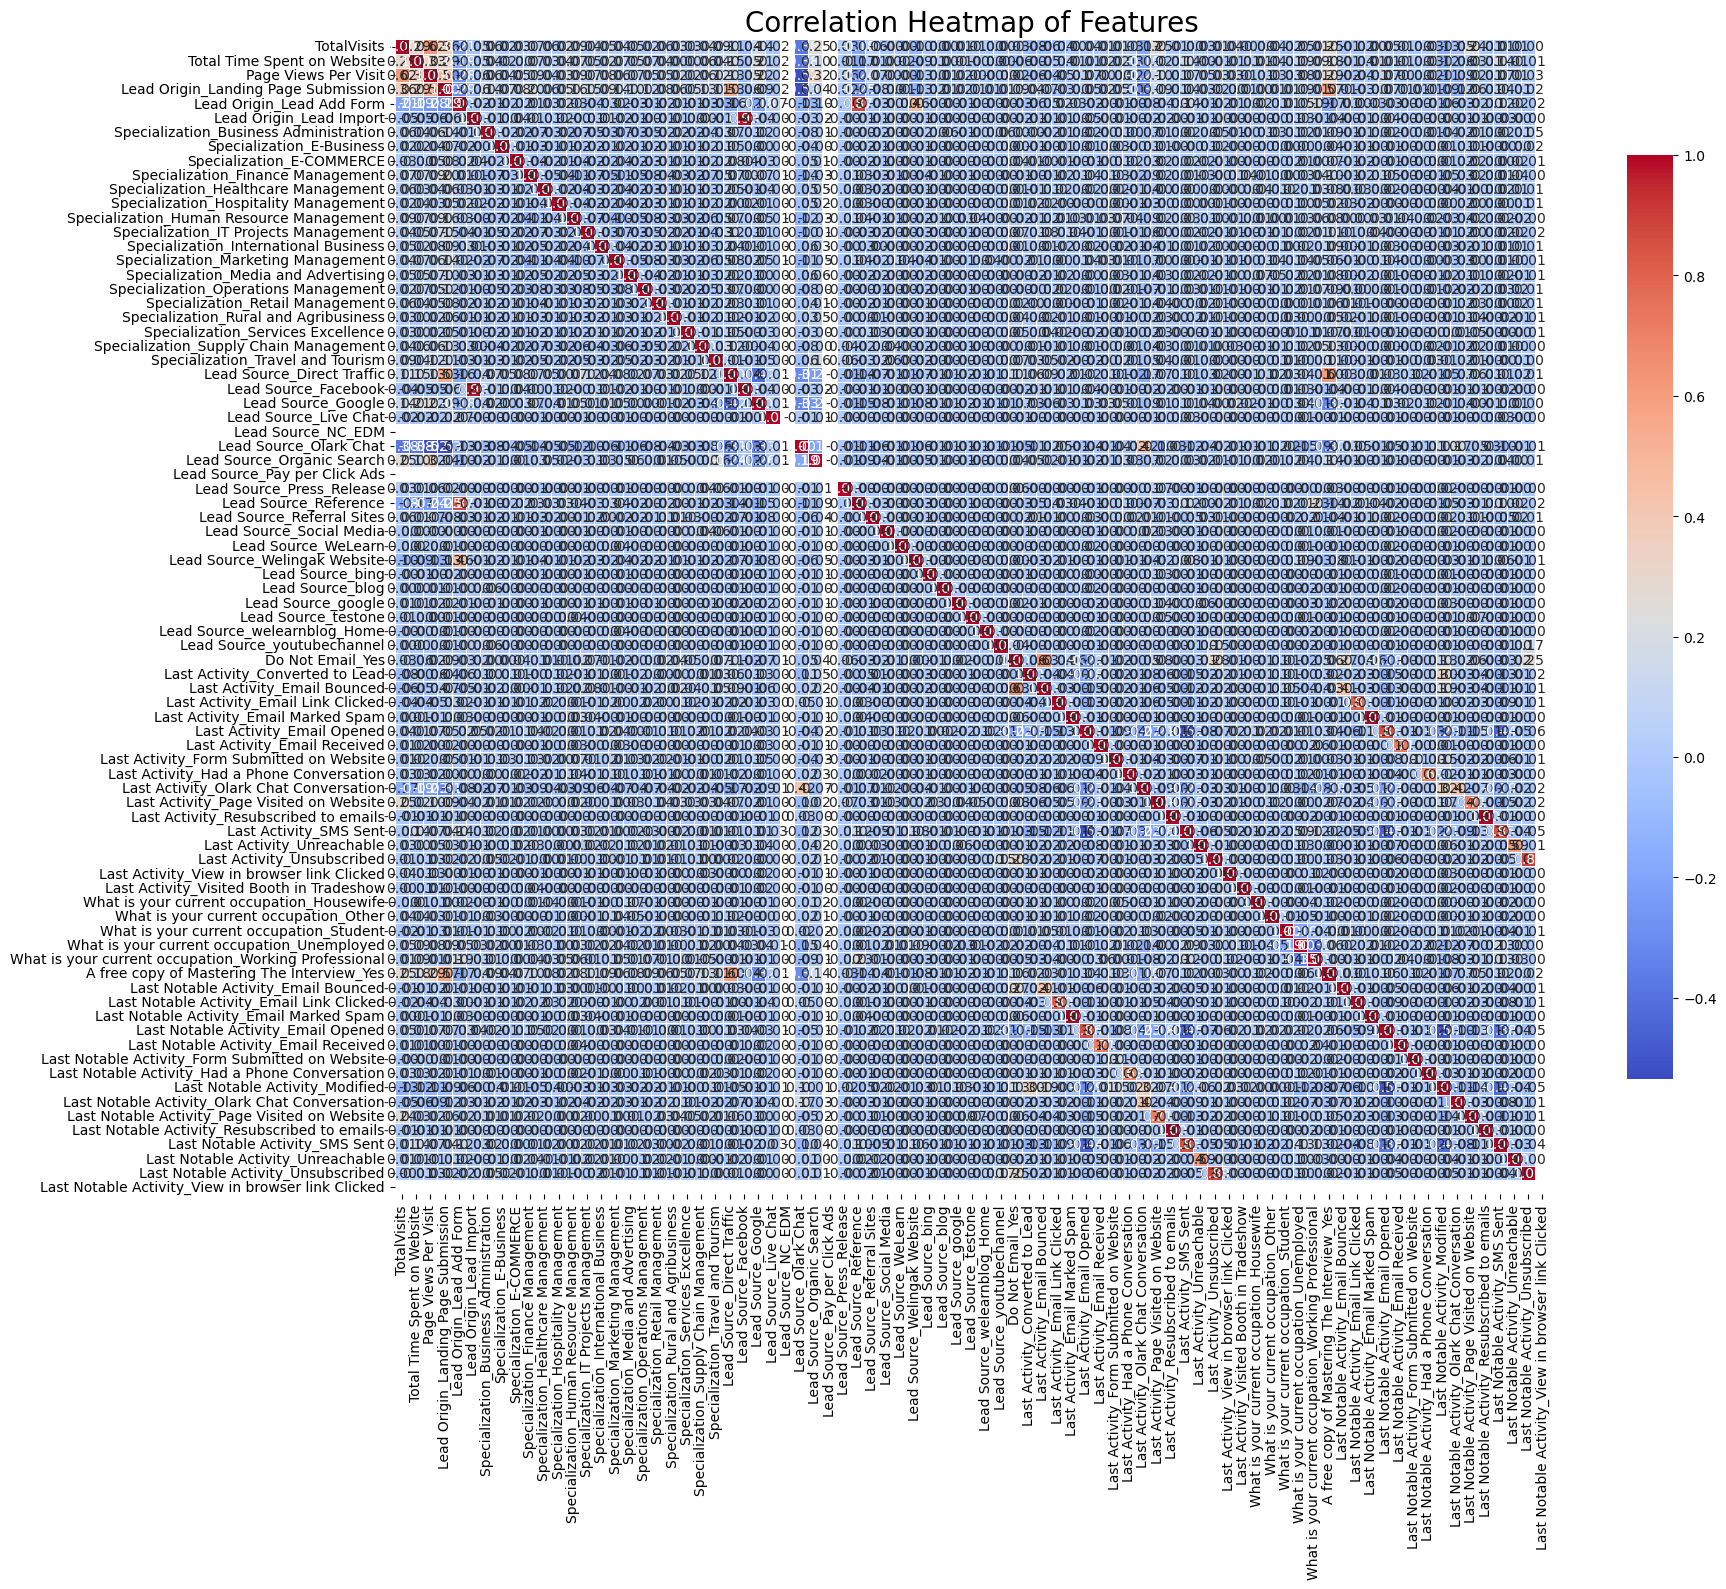

In [69]:
plt.figure(figsize=(20, 15))

sns.heatmap(
    X_train.corr(),            
    annot=True,                
    cmap='coolwarm',           
    fmt='.2f',                 
    linewidths=0.5,            
    cbar_kws={'shrink': 0.8},  
    square=True               
)

plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

Since the dataset contains a large number of variables, it can be challenging to decide which ones to drop. Therefore, we will defer this decision and perform **Recursive Feature Elimination (RFE)** first. RFE will help us identify the most important features by iteratively removing the least important ones, allowing us to make more informed decisions about which variables to keep or drop. This approach ensures that we retain the most relevant features for our model.

### **Feature Selection: Recursive Feature Elimination**

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [73]:
# Import RFE
from sklearn.feature_selection import RFE

In [74]:
rfe = RFE(estimator=logreg, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [75]:
col = X_train.columns[rfe.support_]

In [76]:
# Selecting columns selected by RFE
X_train = X_train[col]

### **Feature Selection: Removing multi-collinearity using Variance Inflation Factor (VIF)**:
VIF value must be less than ≤ 5. Indicates low multicollinearity. The independent variable is reasonably independent of other predictors in the model

In [78]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_Lead Add Form  1.59
7                              Last Activity_SMS Sent  1.54
3                              Lead Source_Olark Chat  1.51
6               Last Activity_Olark Chat Conversation  1.37
12  What is your current occupation_Working Profes...  1.32
4                        Lead Source_Welingak Website  1.31
5                                    Do Not Email_Yes  1.06
10            What is your current occupation_Student  1.05
9               What is your current occupation_Other  1.01
14                  Last Notable Activity_Unreachable  1.01
8           What is your current occupation_Housewife  1.00
13     Last Notable Activity_Had a Phone Conversation  1.00

##### **The VIF values are within acceptable range**

### **Feature Selection: Selecting columns based on the statistical significance of the columns using p-values**:
- After selecting the important features using RFE (Recursive Feature Elimination), the next steps are to evaluate the statistical significance elected features using p-values.
- P-values measure the significance of each feature in a regression model. A smaller p-value (typically below 0.05) indicates that the feature is statistically significant and contributes meaningfully to the model.
To calculate p-values, you can use statsmodels to fit a regression model and extract them for each feature.

In [82]:
# Importing statsmodels
import statsmodels.api as sm

In [83]:
X_train_sm = sm.add_constant(X_train)

# Fitting a logistic regression model using GLM with a binomial family
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial(), link=sm.families.links.logit())

res = logm1.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 26 Jan 2025   Deviance:                       5270.1
Time:                        20:17:19   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\yashr\anaconda3\envs\ms_mle\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)


##### **What is your current occupation_Housewife and Last Notable Activity_Had a Phone Conversation have a high p-value hence we will have to drop them one-by-one**

In [85]:
from copy import deepcopy as cdp
X_train_cp = cdp(X_train) 

In [86]:
## Dropping column "What is your current occupation_Housewife" since it has a high p-value
X_train_cp = X_train_cp.drop('What is your current occupation_Housewife',axis=1)

In [87]:
X_train_cp

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
1289     0.007968                     0.612676                          0   
3604     0.000000                     0.000000                          0   
5584     0.023904                     0.751761                          0   
7679     0.000000                     0.000000                          0   
7563     0.007968                     0.787852                          0   
...           ...                          ...                        ...   
4936     0.007968                     0.147887                          0   
7434     0.003984                     0.076585                          0   
1399     0.011952                     0.255282                          0   
7436     0.000000                     0.000000                          0   
1342     0.003984                     0.018486                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
1289                       0                             0                 0   
3604                       1                             0                 0   
5584                       0                             0                 1   
7679                       1                             0                 0   
7563                       0                             0                 1   
...                      ...                           ...               ...   
4936                       0                             0                 0   
7434                       0                             0                 0   
1399                       0                             0                 0   
7436                       1                             0                 0   
1342                       0                             0                 0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
1289                                      0                       0   
3604                                      0                       0   
5584                                      0                       0   
7679                                      0                       0   
7563                                      0                       0   
...                                     ...                     ...   
4936                                      0                       0   
7434                                      0                       0   
1399                                      0                       0   
7436                                      1                       0   
1342                                      0                       0   

      What is your current occupation_Other  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   
...                                     ...   
4936                                      0   
7434                                      0   
1399                                      0   
7436                                      0   
1342                                      0   

      What is your current occupation_Student  \
1289                                        0   
3604                                        0   
5584                                        0   
7679                                        0   
7563                                        0   
...                                       ...   
4936                                        0   
7434                                        0   
1399                                        0   
7436                                        0   
1342                                        0   

      What is your current occupation_Unemployed  \
1289                                           1   
3604     

In [88]:
X_train_sm = sm.add_constant(X_train_cp)

# Fitting a logistic regression model using GLM with a binomial family
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial(), link=sm.families.links.logit())

res = logm1.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.6
Date:                Sun, 26 Jan 2025   Deviance:                       5287.1
Time:                        20:17:19   Pearson chi2:                 6.50e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\yashr\anaconda3\envs\ms_mle\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)


In [89]:
## Dropping column "Last Notable Activity_Had a Phone Conversation" since it has a high p-value
X_train_cp = X_train_cp.drop('Last Notable Activity_Had a Phone Conversation',axis=1)

In [90]:
X_train_sm = sm.add_constant(X_train_cp)

# Fitting a logistic regression model using GLM with a binomial family
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial(), link=sm.families.links.logit())

res = logm1.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Sun, 26 Jan 2025   Deviance:                       5302.6
Time:                        20:17:19   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\yashr\anaconda3\envs\ms_mle\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)


#### **Finally, the model seems to have only statistically relevant parameters and we can use the model to make predictions**

### **Generating Prediction**

In [93]:
## generating prediction results 
y_train_pred = res.predict(X_train_sm)

print(y_train_pred[:10])

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64


In [94]:
y_train_pred = y_train_pred.ravel()
print(y_train_pred[:10])

[0.64788325 0.13318019 0.23294642 0.13318019 0.49508996 0.77776483
 0.16731088 0.98274125 0.77298038 0.1492489 ]


In [95]:
# Creating a DataFrame with the actual target and predicted probabilities
y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,          
    'Conversion_Prob': y_train_pred      
})

print(y_train_pred_final.head())

   Converted  Conversion_Prob
0          1         0.647883
1          0         0.133180
2          0         0.232946
3          0         0.133180
4          0         0.495090


In [96]:
# Assigning 0 or 1 based on a cutoff of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

print(y_train_pred_final.head())

   Converted  Conversion_Prob  Predicted
0          1         0.647883          1
1          0         0.133180          0
2          0         0.232946          0
3          0         0.133180          0
4          0         0.495090          0


## **Model Evaluation**
- **Confusion Matrix**
- **Sensitivity**
- **Specificity**
- **Accuracy**
- **AUC-ROC curve**
- **Accuracy VS Sensitivity VS Specificity to find optimal threshold** 

### **Confusion Matrix, Accuracy, Sensitivity and Specificity for default a cut-off of 0.5**

In [99]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [100]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

print(confusion)

[[3437  458]
 [ 747 1709]]


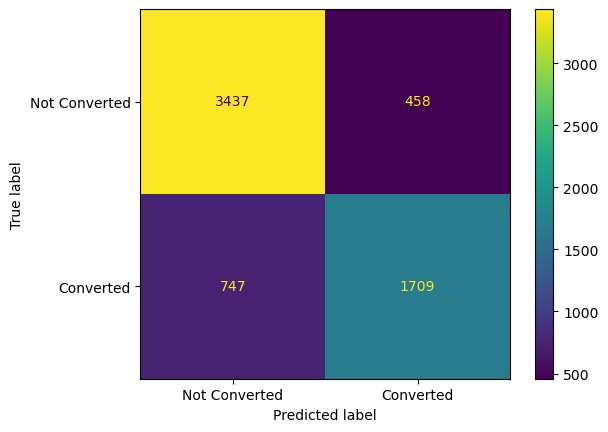

In [101]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train_pred_final['Converted'], y_train_pred_final['Predicted'],display_labels=['Not Converted','Converted'])

In [102]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

print(f"Overall Accuracy: {accuracy:.2%}")

Overall Accuracy: 81.03%


#### **The model achieved an accuracy of approximately 81%, which is a strong performance.**

In [104]:
# Extracting confusion matrix values
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

# Print the values for verification
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 1709
True Negatives (TN): 3437
False Positives (FP): 458
False Negatives (FN): 747


In [105]:
# Calculating the sensitivity
print(f"Sensitivity: {TP/(TP+FN)}")

Sensitivity: 0.6958469055374593


In [106]:
# Calculating the specificity
print(f"specificity: {TN/(TN+FP)}")

specificity: 0.8824133504492939


Text(0, 0.5, 'Values')

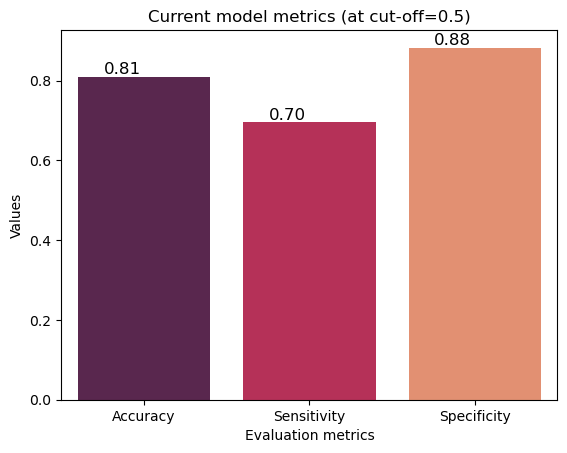

In [107]:
bar_plt = sns.barplot(x=['Accuracy','Sensitivity','Specificity'],
    y=[metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),
            TP/(TP+FN),
            TN/(TN+FP)],palette='rocket'
            )
for p in bar_plt.patches: 
    bar_plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 3, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Current model metrics (at cut-off=0.5)')
plt.xlabel('Evaluation metrics')
plt.ylabel('Values')

#### **With the current cutoff of 0.5, the model achieves an accuracy of approximately 81%, a sensitivity of around 69%, and a specificity of about 88% on train set.**

### **AUC-ROC curve to see default model's performance due to the imbalanced dataset**

In [110]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

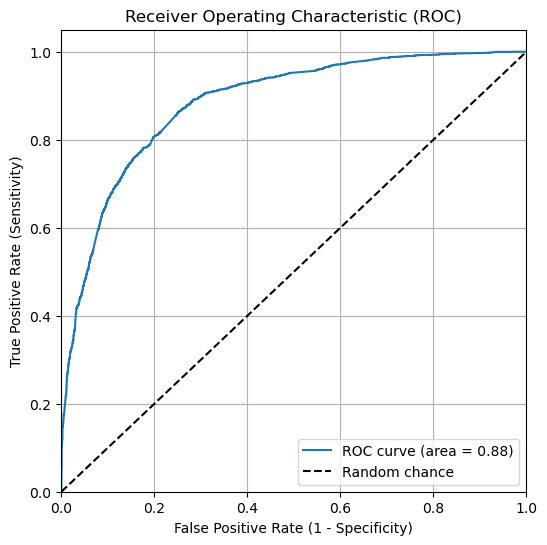

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### **We have an AUC-ROC score of 0.88 which is an indicator of model's distinguishing ability**

### **Plotting an Accuracy vs Sensitivity vs Specificity vs Threshold to find an optimum threshold**

In [115]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [116]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob_cutoff  accuracy     sensi     speci
0.0          0.0  0.386711  1.000000  0.000000
0.1          0.1  0.577232  0.983306  0.321181
0.2          0.2  0.758306  0.912866  0.660847
0.3          0.3  0.788852  0.872557  0.736072
0.4          0.4  0.809321  0.765879  0.836714
0.5          0.5  0.810266  0.695847  0.882413
0.6          0.6  0.802708  0.627850  0.912965
0.7          0.7  0.773579  0.504072  0.943517
0.8          0.8  0.753582  0.413681  0.967908
0.9          0.9  0.706660  0.260179  0.988190

Text(0.5, 1.0, 'Accuracy, Sensitivity (TPR), and Specificity (TNR) at different probability cut-off')

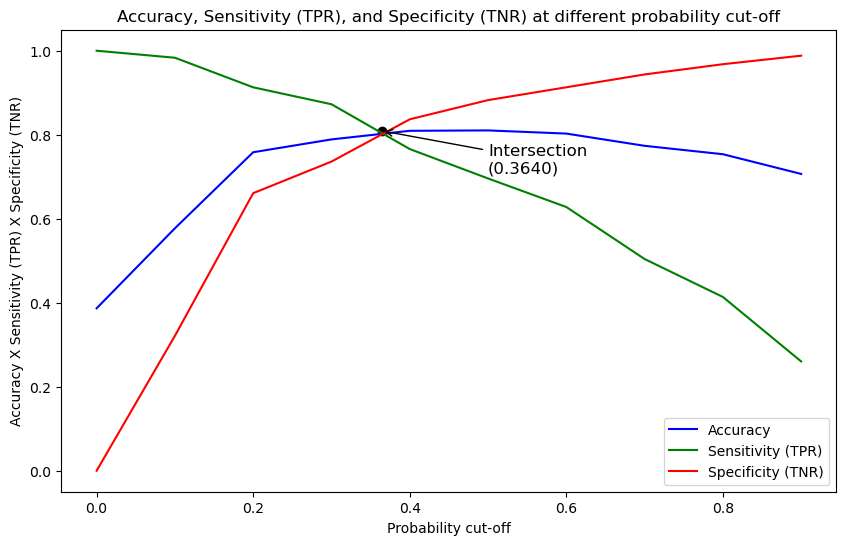

In [117]:
intersection_index = cutoff_df.loc[(cutoff_df['accuracy'] - cutoff_df['sensi']).abs().idxmin()] 
intersection_x = intersection_index['prob_cutoff'] 
intersection_y = intersection_index['accuracy']

plt.figure(figsize=(10, 6)) 
plt.plot(cutoff_df['prob_cutoff'], cutoff_df['accuracy'], label='Accuracy', color='blue') 
plt.plot(cutoff_df['prob_cutoff'], cutoff_df['sensi'], label='Sensitivity (TPR)', color='green') 
plt.plot(cutoff_df['prob_cutoff'], cutoff_df['speci'], label='Specificity (TNR)', color='red') 
# Highlight the intersection point 
plt.scatter([intersection_x-0.036], [intersection_y], color='black') 
plt.annotate(f'Intersection\n({intersection_x-0.036:.4f})', xy=(intersection_x-0.036, intersection_y), 
             xytext=(intersection_x + 0.1, intersection_y - 0.1), arrowprops=dict(facecolor='black', arrowstyle='->'), 
                fontsize=12, color='black')
plt.legend()
plt.xlabel('Probability cut-off')
plt.ylabel('Accuracy X Sensitivity (TPR) X Specificity (TNR)')
plt.title('Accuracy, Sensitivity (TPR), and Specificity (TNR) at different probability cut-off') 

#### **From the graph it is visible that the optimal cut off is at 0.36.**

### **Running evaluation metrics on the new cut-off of 0.36**

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [121]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017635018107385

In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3158,  737],
       [ 522, 1934]], dtype=int64)

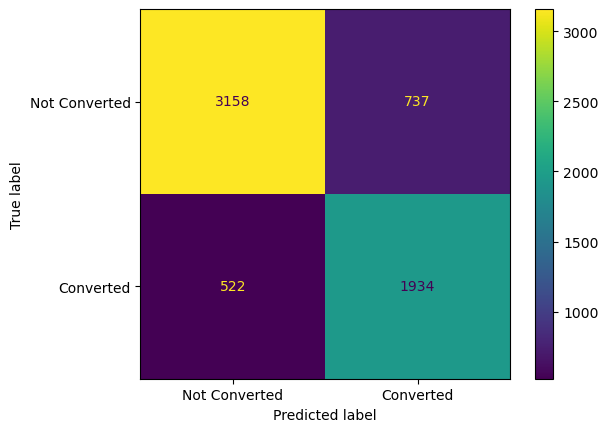

In [123]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'],display_labels=['Not Converted','Converted'])

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Calculating the sensitivity
TP/(TP+FN)

0.7874592833876222

In [126]:
# Calculating the specificity
TN/(TN+FP)

0.8107830551989731

In [127]:
accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(f"Overall Accuracy: {accuracy:.2%}")

Overall Accuracy: 80.18%


Text(0, 0.5, 'Values')

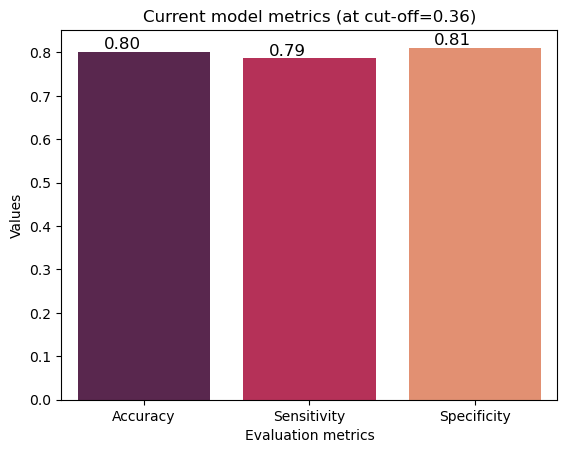

In [128]:
bar_plt = sns.barplot(x=['Accuracy','Sensitivity','Specificity'],
    y=[metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),
            TP/(TP+FN),
            TN/(TN+FP)],palette='rocket'
            )
for p in bar_plt.patches: 
    bar_plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 3, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Current model metrics (at cut-off=0.36)')
plt.xlabel('Evaluation metrics')
plt.ylabel('Values')

#### **With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80%.**

### **Calculating Precision and Recall of the default model and plotting Precision-Recall curve to improve model's performance**

In [131]:
### For the current cut off as 0.5 .The accuracy, sensitivity and specificity are around 81,69% and 88% respectively.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

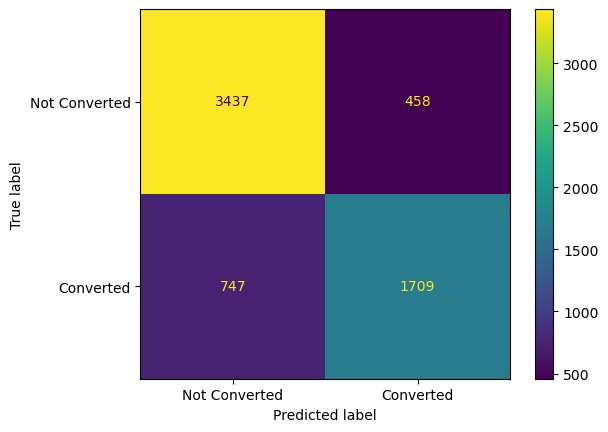

In [132]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train_pred_final['Converted'], y_train_pred_final['Predicted'],display_labels=['Not Converted','Converted'])

In [133]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [134]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


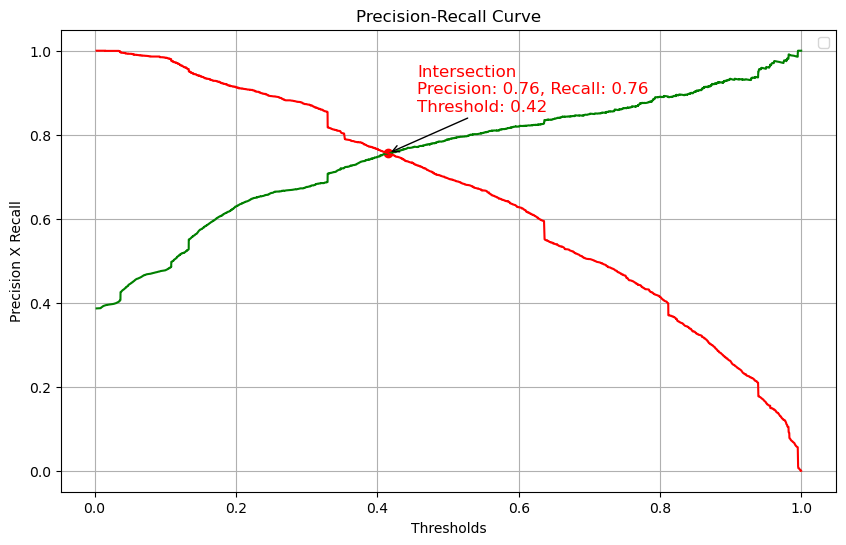

In [137]:
plt.figure(figsize=(10, 6))
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Plot Precision-Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

# Identify the intersection point where precision equals recall
intersection_index = (np.abs(p - r)).argmin()
intersection_precision = p[intersection_index]
intersection_recall = r[intersection_index]
intersection_threshold = thresholds[intersection_index]

# Highlight the intersection point
plt.scatter(intersection_threshold,intersection_recall, color='red')
plt.annotate(f'Intersection\nPrecision: {intersection_precision:.2f}, Recall: {intersection_recall:.2f}\nThreshold: {intersection_threshold:.2f}',
             xy=(intersection_threshold, intersection_recall),
             xytext=(intersection_recall - 0.3, intersection_precision + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

plt.ylabel('Precision X Recall')
plt.xlabel('Thresholds')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [139]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108959219020627

In [140]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3302,  593],
       [ 608, 1848]], dtype=int64)

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7570667759115117

In [143]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.752442996742671

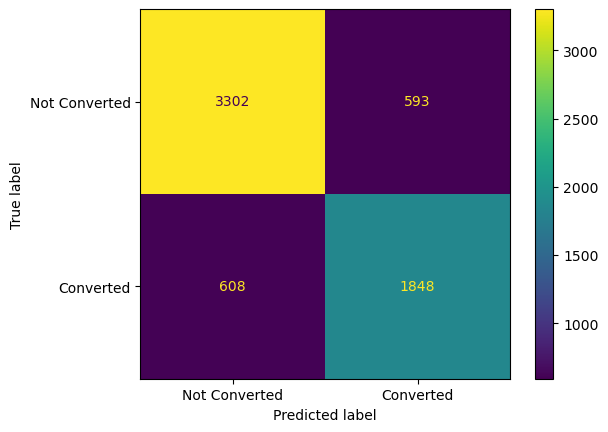

In [144]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'],display_labels=['Not Converted','Converted'])

Text(0, 0.5, 'Values')

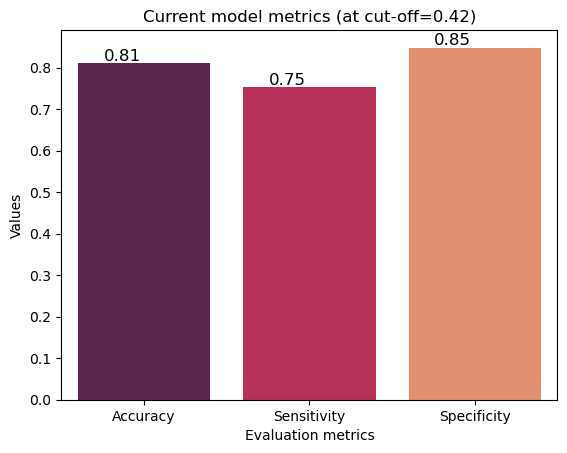

In [145]:
bar_plt = sns.barplot(x=['Accuracy','Sensitivity','Specificity'],
    y=[metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),
            TP/(TP+FN),
            TN/(TN+FP)],palette='rocket'
            )
for p in bar_plt.patches: 
    bar_plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 3, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Current model metrics (at cut-off=0.42)')
plt.xlabel('Evaluation metrics')
plt.ylabel('Values')

#### **With the current cut off as 0.42 for train data we have Precision around 76% and Recall around 77%. As also can be the seen the sensitivity is also less for this cut-off value. Hence we will be proceeding with the cut-off of 0.36**

## **Prediction on Test set**

In [148]:
# Substituting all the columns in the final train model
col = X_train_cp.columns

In [149]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8308    1.0     0.019920                     0.416813   
7212    1.0     0.015936                     0.001320   
2085    1.0     0.000000                     0.000000   
4048    1.0     0.015936                     0.617077   
4790    1.0     0.015936                     0.005282   
...     ...          ...                          ...   
3261    1.0     0.000000                     0.000000   
8179    1.0     0.095618                     0.148768   
6236    1.0     0.000000                     0.000000   
5240    1.0     0.043825                     0.458627   
7243    1.0     0.019920                     0.499560   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
8308                          0                       0   
7212                          0                       0   
2085                          1                       0   
4048                          0                       0   
4790                          0                       0   
...                         ...                     ...   
3261                          0                       1   
8179                          0                       0   
6236                          0                       1   
5240                          0                       0   
7243                          0                       0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
8308                             0                 0   
7212                             0                 0   
2085                             1                 0   
4048                             0                 0   
4790                             0                 0   
...                            ...               ...   
3261                             0                 0   
8179                             0                 0   
6236                             0                 0   
5240                             0                 0   
7243                             0                 0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
8308                                      0                       0   
7212                                      0                       1   
2085                                      0                       0   
4048                                      0                       1   
4790                                      0                       0   
...                                     ...                     ...   
3261                                      1                       0   
8179                                      0                       1   
6236                                      0                       0   
5240                                      0                       1   
7243                                      0                       0   

      What is your current occupation_Other  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   
...                                     ...   
3261                                      0   
8179                                      0   
6236                                      0   
5240                                      0   
7243                                      0   

      What is your current occupation_Student  \
8308                                        0   
7212                                        0   
2085                                        0   
4048                                        0   
4790                                        0   
...                                       ...   
3261                                        0   
8179                                        0   
6236                                        0   
5240                           

In [150]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.456551
1          1         0.839834
2          1         0.982741
3          1         0.878240
4          0         0.108266

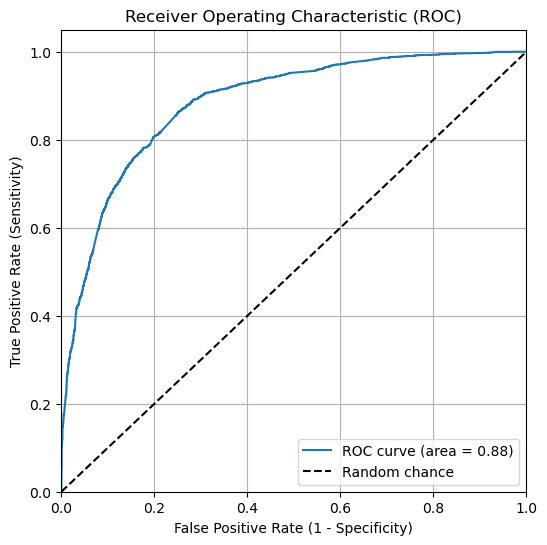

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False)
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [152]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.456551                1
1             1         0.839834                1
2             1         0.982741                1
3             1         0.878240                1
4             0         0.108266                0
...         ...              ...              ...
2718          1         0.108386                0
2719          0         0.364110                1
2720          0         0.133180                0
2721          1         0.820744                1
2722          1         0.551516                1

[2723 rows x 3 columns]

In [153]:
y_pred_final['final_predicted'].value_counts(normalize=True)*100

final_predicted
0    59.346309
1    40.653691
Name: proportion, dtype: float64

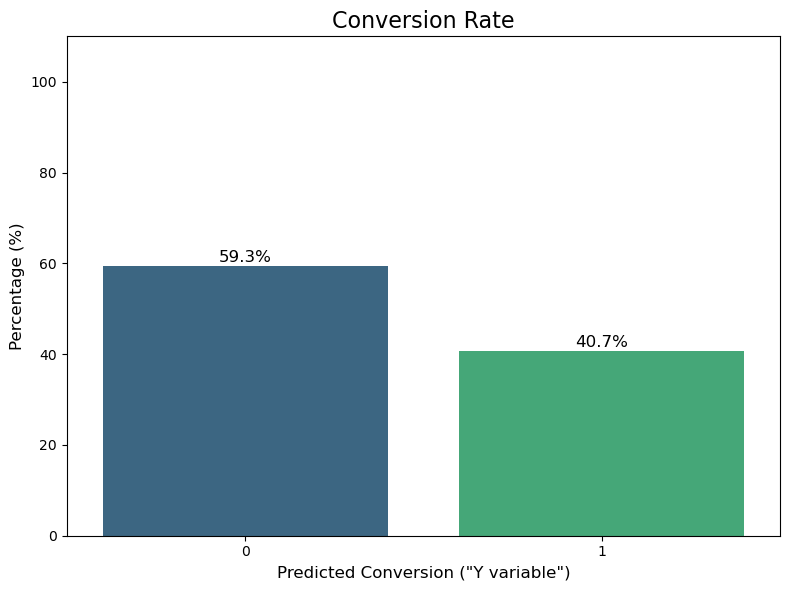

In [154]:
# Calculate percentages
converted_counts = (y_pred_final['final_predicted'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_counts.index, 
    y=converted_counts.values, 
    palette='viridis'
)
plt.title('Conversion Rate', fontsize=16)
plt.xlabel('Predicted Conversion ("Y variable")', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

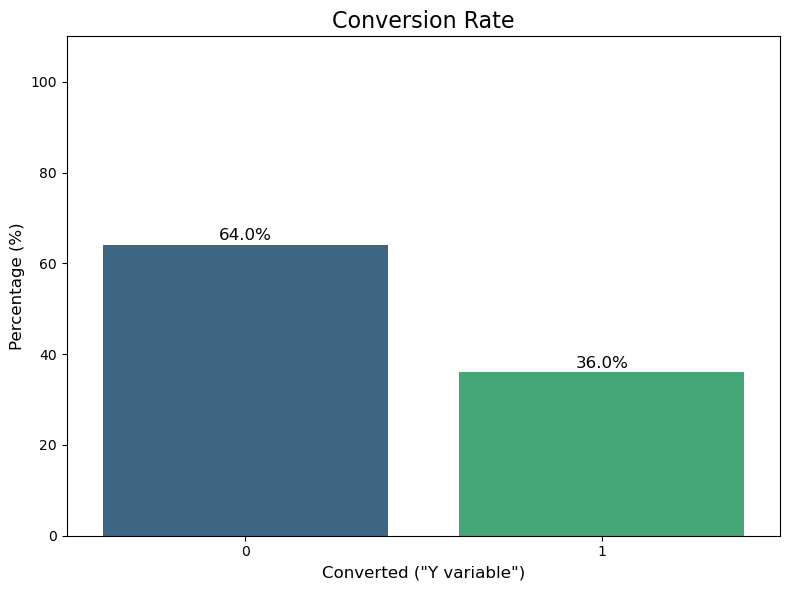

In [155]:
# Calculate percentages
converted_counts = (y_pred_final['Converted'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_counts.index, 
    y=converted_counts.values, 
    palette='viridis'
)
plt.title('Conversion Rate', fontsize=16)
plt.xlabel('Converted ("Y variable")', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

In [156]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8090341535071612

In [157]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1420,  324],
       [ 196,  783]], dtype=int64)

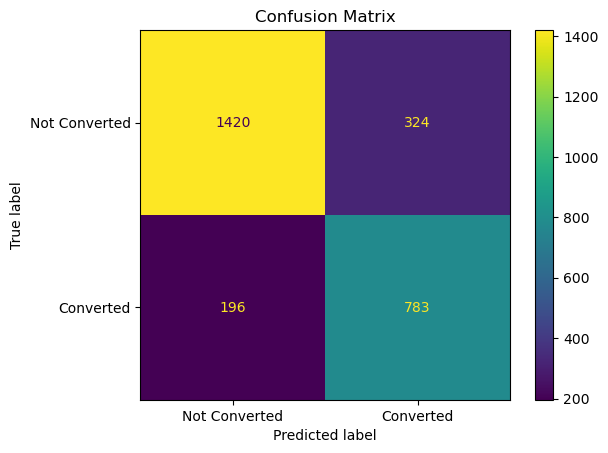

In [158]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2,
                              display_labels=['Not Converted','Converted'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [159]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [160]:
# Calculating the sensitivity
TP/(TP+FN)

0.7997957099080695

In [161]:
# Calculating the specificity
TN/(TN+FP)

0.8142201834862385

Text(0, 0.5, 'Values')

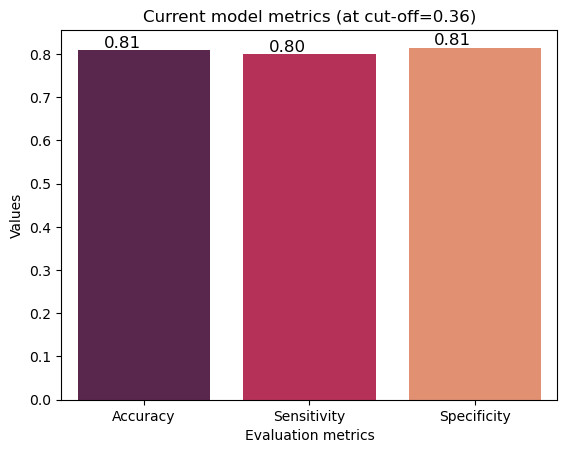

In [162]:
bar_plt = sns.barplot(x=['Accuracy','Sensitivity','Specificity'],
    y=[metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),
            TP/(TP+FN),
            TN/(TN+FP)],palette='rocket'
            )
for p in bar_plt.patches: 
    bar_plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 3, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Current model metrics (at cut-off=0.36)')
plt.xlabel('Evaluation metrics')
plt.ylabel('Values')

#### **For the current cut off as 0.36 .The accuracy, sensitivity and specificity are around 80% compared to the 0.41 cut-off obtained from the Precision-recall curve. Hence we will move ahead with the cut-off of 0.36**

## **Business Evaluation or Requirement fulfillment**
- **Of the total predicted as positive how many are accurately predicted i.e. Sensitivity**
- **Lead score assignment(train set and test set)**
- **Questions mentioned in the subjective questions document**

#### **On complete dataset**

In [166]:
lead_final = lead3_dum[X_train_cp.columns]

In [167]:
lead_final.shape

(9074, 13)

In [168]:
lead_final_sm = sm.add_constant(lead_final)
lead_final_sm.shape

(9074, 14)

In [169]:
# Storing prediction of test set in the variable 'y_test_pred'
y_prob = res.predict(lead_final_sm)

In [170]:
# Renaming column 
lead_final['Lead_Score'] = round(y_prob*100,2)

In [171]:
lead_final.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
0     0.000000                     0.000000                          0   
1     0.019920                     0.296655                          0   
2     0.007968                     0.674296                          0   
3     0.003984                     0.134243                          0   
4     0.007968                     0.628521                          0   

   Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
0                       1                             0                 0   
1                       0                             0                 0   
2                       0                             0                 0   
3                       0                             0                 0   
4                       0                             0                 0   

   Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Last Notable Activity_Unreachable  Lead_Score  
0                                  0       32.96  
1                                  0       32.57  
2                                  0       72.63  
3                                  0       16.35  
4                                  0       66.43

In [172]:
# Renaming column 
y_pred_final = pd.DataFrame({'Converted':lead3_dum['Converted'],'Conversion_prob':y_prob})
y_pred_final['Converted_prediction'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

Converted  Conversion_prob  Converted_prediction
0          0         0.329604                     0
1          0         0.325734                     0
2          1         0.726311                     1
3          0         0.163466                     0
4          1         0.664344                     1

In [173]:
y_pred_final_convs = y_pred_final.loc[y_pred_final.Converted==1,:]

In [174]:
y_pred_final_convs.head()

Converted  Conversion_prob  Converted_prediction
2           1         0.726311                     1
4           1         0.664344                     1
6           1         0.752574                     1
10          1         0.681898                     1
11          1         0.678371                     1

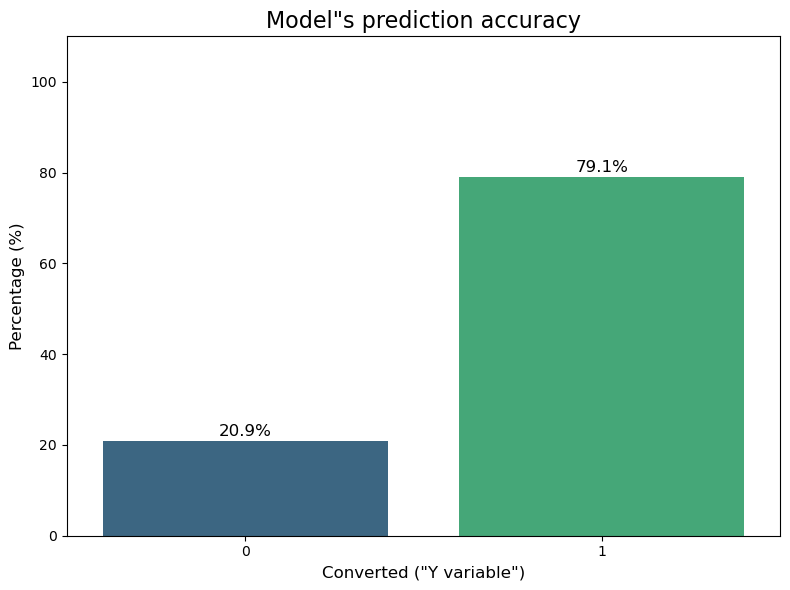

In [175]:
# Calculate percentages
converted_counts = (y_pred_final_convs['Converted_prediction'].value_counts(normalize=True) * 100).sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=converted_counts.index, 
    y=converted_counts.values, 
    palette='viridis'
)
plt.title('Model"s prediction accuracy', fontsize=16)
plt.xlabel('Converted ("Y variable")', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(converted_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

In [176]:
res.params.sort_values(ascending=False)

TotalVisits                                             9.866742
Total Time Spent on Website                             4.604821
Lead Origin_Lead Add Form                               3.750105
What is your current occupation_Working Professional    3.679731
Lead Source_Welingak Website                            2.582057
What is your current occupation_Other                   2.156716
Last Notable Activity_Unreachable                       1.815310
Lead Source_Olark Chat                                  1.580159
Last Activity_SMS Sent                                  1.267234
What is your current occupation_Student                 1.245642
What is your current occupation_Unemployed              1.163151
Last Activity_Olark Chat Conversation                  -1.397360
Do Not Email_Yes                                       -1.436043
const                                                  -3.453287
dtype: float64

In [177]:
res.params.sort_values(ascending=False)[:3]

TotalVisits                    9.866742
Total Time Spent on Website    4.604821
Lead Origin_Lead Add Form      3.750105
dtype: float64

## **The Final Model is capable of predicting around 79.1% of the Conversions correctly for the entire dataset.**